# Medical Insurance Premium Charges Prediction 
* With the growing uncertainties in life, it is important to have a financial backup to look after your medical expenses at the time of an emergency without draining your savings. The inflation in the health sector has increased rapidly over the past few years, and therefore affordable health nsurance plans are worthy of your investment.
* Early health insurance amount prediction can help in better contemplation of the amount needed. Where a person can ensure that the amount he/she is going to opt is justified. Also it can provide an idea about gaining extra benefits from the health insurance.

# Problem Statement
**The dataset contains Health Related Parameters of the Customers. Build a Model that predicts the yearly medical insurance cost which can help solve a crucial finance problem that would potentially impact many people and would help them make better decisions.**

* A health insurance premium calculator is an online tool that helps a potential health insurance buyer to get an estimate of the premium amount that he/she will be required to pay for a particular health insurance plan. With the rising medical expenses, calculating the premium becomes important.

## Import necessary libraries

In [576]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import RobustScaler, LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline

from pickle import dump
from pickle import load

import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [577]:
#Reading the dataset
data = pd.read_csv('insurance.csv')
data

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
0,19,female,28,0,no,0,0,0,0,0,0,0,southwest,9887
1,27,male,34,1,no,1,0,0,0,0,0,0,southeast,34789
2,18,female,30,0,no,1,1,0,0,0,1,1,southeast,37000
3,18,male,16,0,no,1,1,0,0,0,1,1,northwest,37461
4,18,male,34,0,no,0,0,0,0,0,0,1,northwest,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,30,male,23,1,yes,1,0,1,1,1,1,0,southeast,57613
1555,31,male,26,2,yes,1,0,1,1,1,1,0,southeast,58463
1556,33,male,25,3,yes,1,0,1,1,1,1,0,southeast,59778
1557,29,male,22,1,yes,1,0,1,1,1,1,0,southeast,57000


## EDA 

### Data understanding & checking missing/null values

In [578]:
# Checking the size of dataset
data.shape

(1559, 14)

In [579]:
#Summarizing the overall dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1559 non-null   int64 
 1   Sex                      1559 non-null   object
 2   BMI                      1559 non-null   int64 
 3   Children                 1559 non-null   int64 
 4   Smoker                   1559 non-null   object
 5   Diabetes                 1559 non-null   int64 
 6   BloodPressure_Problems   1559 non-null   int64 
 7   Any_Transplants          1559 non-null   int64 
 8   Any_ChronicDiseases      1559 non-null   int64 
 9   Known_Allergies          1559 non-null   int64 
 10  HistoryOfCancerInFamily  1559 non-null   int64 
 11  NumberOfMajorSurgeries   1559 non-null   int64 
 12  Region                   1559 non-null   object
 13  Premium_charges          1559 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 17

In [580]:
#Checking the null values in dataset
data.isnull().sum()

Age                        0
Sex                        0
BMI                        0
Children                   0
Smoker                     0
Diabetes                   0
BloodPressure_Problems     0
Any_Transplants            0
Any_ChronicDiseases        0
Known_Allergies            0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
Region                     0
Premium_charges            0
dtype: int64

In [581]:
#Checking the duplicate values
data.duplicated().sum()

4

In [582]:
#Reviewing the duplicate values
data[data.duplicated()]

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
1402,27,female,35,2,no,1,1,1,0,1,1,0,northwest,52000
1403,27,female,34,2,no,1,1,1,0,1,1,0,northeast,52000
1404,27,female,33,2,no,1,1,1,0,1,1,0,southwest,52000
1428,28,female,35,2,yes,0,0,1,0,1,1,0,southwest,55000


In [583]:
#Dropping the duplicate values & reset the index
data = data.drop_duplicates().reset_index(drop=True)
data

,Age,Sex,BMI,Children,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Region,Premium_charges
0,19,female,28,0,no,0,0,0,0,0,0,0,southwest,9887
1,27,male,34,1,no,1,0,0,0,0,0,0,southeast,34789
2,18,female,30,0,no,1,1,0,0,0,1,1,southeast,37000
3,18,male,16,0,no,1,1,0,0,0,1,1,northwest,37461
4,18,male,34,0,no,0,0,0,0,0,0,1,northwest,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,30,male,23,1,yes,1,0,1,1,1,1,0,southeast,57613
1551,31,male,26,2,yes,1,0,1,1,1,1,0,southeast,58463
1552,33,male,25,3,yes,1,0,1,1,1,1,0,southeast,59778
1553,29,male,22,1,yes,1,0,1,1,1,1,0,southeast,57000


In [584]:
#Statistical description of numerical data
data.describe()

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Premium_charges
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,38.954341,31.219936,1.317685,0.504823,0.472669,0.393569,0.276527,0.344695,0.208360,0.720257,52943.433441
std,12.808956,6.437542,1.351167,0.500138,0.499413,0.488698,0.447425,0.475421,0.406266,0.867440,14379.738343
min,18.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8561.000000
25%,28.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43233.000000
50%,37.000000,31.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52000.000000
75%,49.000000,36.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,64000.000000
max,64.000000,53.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,85000.000000


In [585]:
#Statistical description of categorical data
data.describe(include='O')

,Sex,Smoker,Region
count,1555,1555,1555
unique,2,2,4
top,male,no,southeast
freq,786,1172,405


In [586]:
#Checking the unique values in categorical columns
col = data.columns[data.dtypes=='object']

for i in col:
    uqv = data[i].unique()
    print(i, ':', uqv,'\n')

Sex : ['female' 'male'] 

Smoker : ['no' 'yes'] 

Region : ['southwest' 'southeast' 'northwest' 'northeast'] 



In [587]:
#Checking the unique values in numerical columns
col = col = data.columns[data.dtypes!='object'][:-1]

for i in col:
    uqv = data[i].unique()
    print(i, ':', np.sort(uqv),'\n')   

Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64] 

BMI : [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45 46 47 48 49 50 53] 

Children : [0 1 2 3 4 5] 

Diabetes : [0 1] 

BloodPressure_Problems : [0 1] 

Any_Transplants : [0 1] 

Any_ChronicDiseases : [0 1] 

Known_Allergies : [0 1] 

HistoryOfCancerInFamily : [0 1] 

NumberOfMajorSurgeries : [0 1 2 3] 



#### From above analysis, we can say that there are no null values in dataset BUT there were duplicate values which we had removed successfully. 

**Let's try to explore our dataset  in detail and try to visualise, draw inference thereon.**

### Data Visualization & Drawing Inference

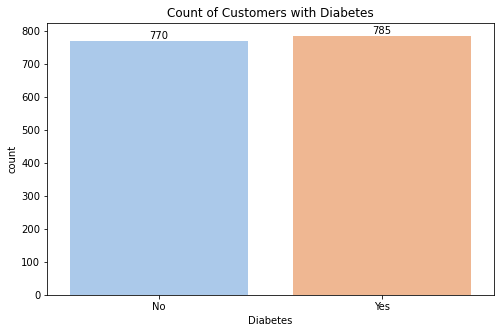

In [13]:
#Visualising the count of customers with diabetes
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['Diabetes'], palette="pastel")
plt.title('Count of Customers with Diabetes')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that we have a balanced count of data of customers with Diabetes & Non-diabetic problem.

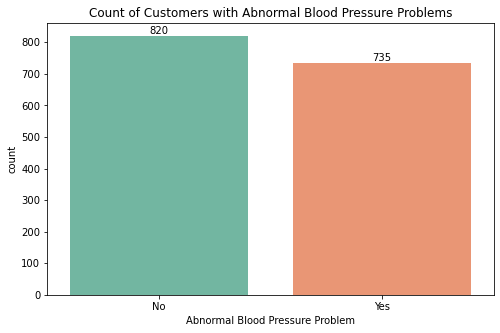

In [14]:
#Visualising the count of customers with Blood Pressure Problems
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['BloodPressure_Problems'], palette="Set2")
plt.title('Count of Customers with Abnormal Blood Pressure Problems')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Abnormal Blood Pressure Problem')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that around 47% customers have Abnormal Blood Pressure Problem while rest do not have any blood pressure problem.

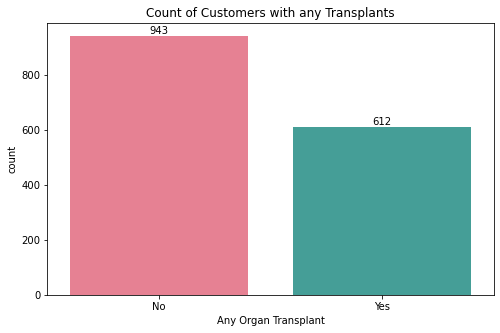

In [15]:
#Visualising the count of customers with Any_Transplants
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['Any_Transplants'], palette="husl")
plt.title('Count of Customers with any Transplants')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Any Organ Transplant')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that around 40% customers had an Organ Transplant in past.

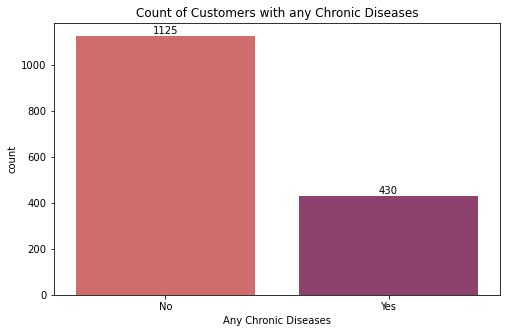

In [16]:
#Visualising the count of customers with Any_Transplants
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['Any_ChronicDiseases'], palette="flare")
plt.title('Count of Customers with any Chronic Diseases')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Any Chronic Diseases')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that around 28% customers are suffering from a Chronic diseases.

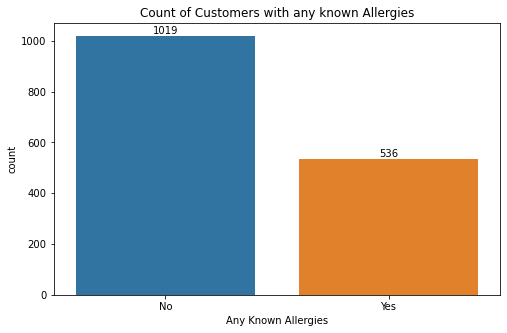

In [17]:
#Visualising the count of customers with Known Allergies
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['Known_Allergies'])
plt.title('Count of Customers with any known Allergies')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Any Known Allergies')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that around 35% customers are having some known Allergies.

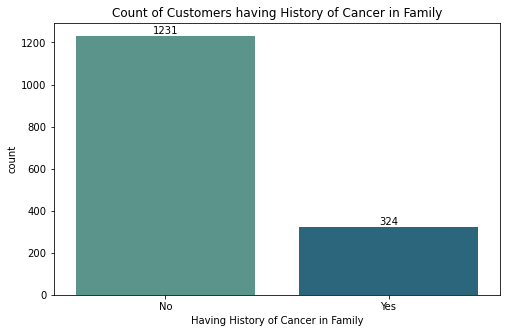

In [18]:
#Visualising the count of customers having a history of cancer in family
plt.figure(figsize=(8,5))
ax = sns.countplot(x = data['HistoryOfCancerInFamily'], palette="crest")
plt.title('Count of Customers having History of Cancer in Family')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.xlabel('Having History of Cancer in Family')
ax.bar_label(ax.containers[0])
plt.show()

#### From above visual, we can say that around 20% customers are having a history of cancer in their family.

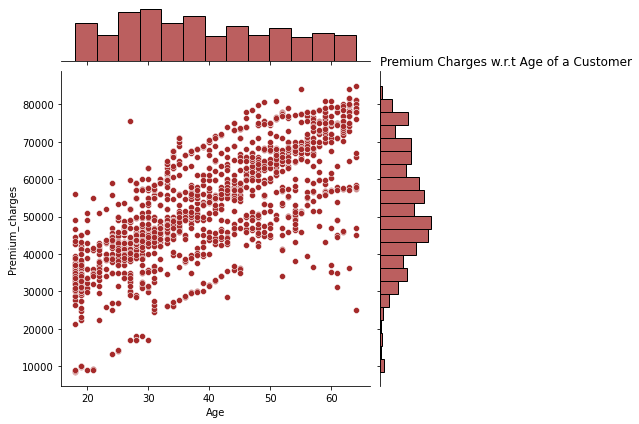

In [19]:
#Visualising the Premium charges w.r.t Age of customer
sns.jointplot(x='Age', y='Premium_charges', color='brown', data=data)
plt.title('Premium Charges w.r.t Age of a Customer', loc='left')
plt.show()

#### From above visual, we can say that 
* We have used a joint plot, it comprises three plots (2 univariate, 1 bivariate).One plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph and it shows the distribution of the dependent variable(Y).

* There is an upward trend, as age increases premium charges increases, assuming other factors remains constant. 

* Most of the customers are from the age group of 25-45.

* Frequent premium charges ranges in between 30K - 60K per annum.

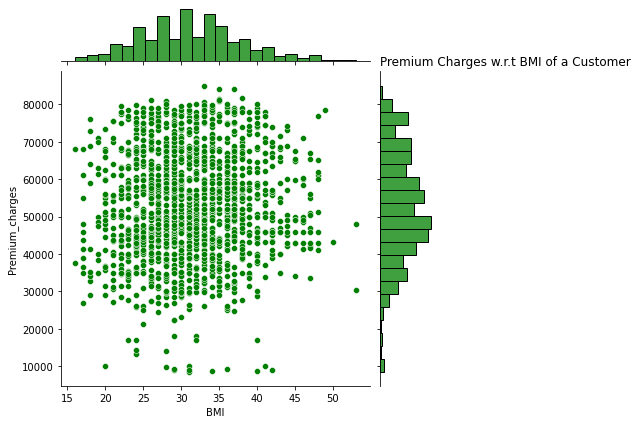

In [20]:
#Visualising the Premium charges w.r.t BMI of customer
sns.jointplot(x='BMI', y='Premium_charges', color='green', data=data)
plt.title('Premium Charges w.r.t BMI of a Customer', loc='left')
plt.show()

#### From above visual, we can say that 
* We have used a joint plot, it comprises three plots (2 univariate, 1 bivariate).One plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph and it shows the distribution of the dependent variable(Y).

* There is no relationship among BMI & Premium Charges. Premium charges are high 

* Most of the customers are having BMI in the index range of 25-35.

* Few data points of Premium charges is quite low at high BMI index, compare to other data points. 

* Hence, Those data points can be consider as outliers.

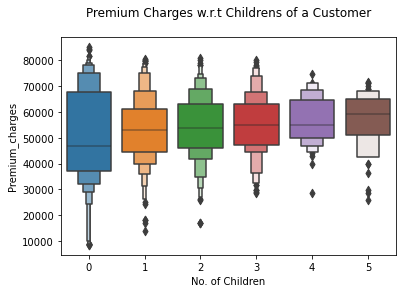


 The count of customers having/not children:
0    574
1    378
2    300
3    190
4     64
5     49
Name: Children, dtype: int64


In [21]:
#Visualising the Premium charges w.r.t customer having childrens
#plt.figure(figsize=(12,5))
sns.boxenplot(x='Children', y='Premium_charges', data=data)
plt.title('Premium Charges w.r.t Childrens of a Customer\n')
plt.xlabel('No. of Children')
plt.show()

print('\n', '\x1B[1m'+'The count of customers having/not children:'+'\x1B[0m')
print(data['Children'].value_counts())

#### From above visual, we can say that 
* We have used a boxen plot, an enhanced box plot; as it shows a large number of quantiles and provides more information about the shape of the distribution, particularly in the tails.

* The median premium charges for customers with no kids are lower compared to customers having kids.

* Also, the min premium charges are lower for customers with no kids compared to customers having kids.

* Around 37% customers are not having kids, rest have childrens according to our dataset.

* Extreme data points represented in black diamond shaped symbol can be treated as outliers and take appropriate actions while model building.

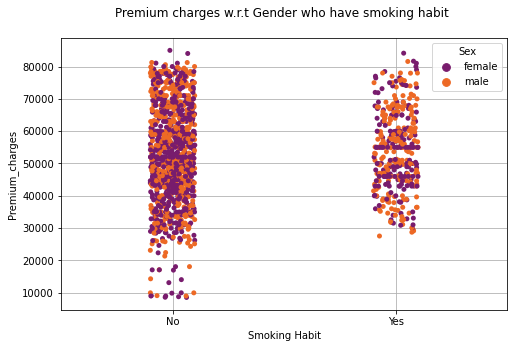


 The count of Male and/or Female customers whom having smoking habit:


Smoker,no,yes
Sex,,
female,603,166
male,569,217


In [22]:
#Visualising the Premium charges w.r.t Gender who have smoking habits 
plt.figure(figsize=(8,5))
sns.stripplot(x='Smoker', y='Premium_charges', data=data, hue='Sex', palette='inferno')
plt.title('Premium charges w.r.t Gender who have smoking habit \n')
plt.xlabel('Smoking Habit')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.grid()
plt.show()

print('\n', '\x1B[1m'+'The count of Male and/or Female customers whom having smoking habit:'+'\x1B[0m')
pd.crosstab(data.Sex, data.Smoker)

#### From above visual, we can say that 
* We have used a stripplot, as it tries to give a little—well and lot—more information than box plots. They plot every point in the dataset, which make it is easy to see all the outliers. The density of points also gives an approximation of the underlying distribution. 

* The minimum premium charges for customers with smoking habits are comparatively higher than customers with non-smoking habits.

* Around 25% customers are having smoking habit, rest all do not smoke as per our data.

* According to our data, approx. 28% male customers are having smoking habits and around 22% female customers are having smoking habits.

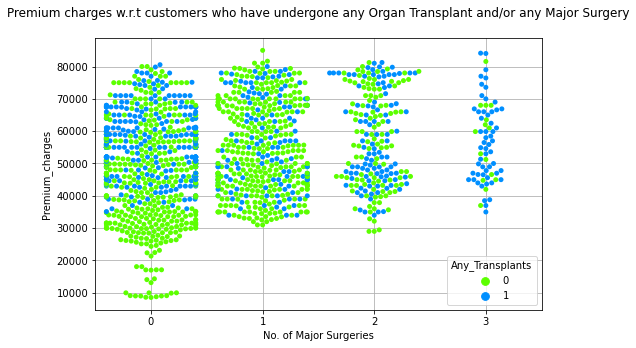


 The count of customers who had any transplant and/or any major surgery:


NumberOfMajorSurgeries,0,1,2,3
Any_Transplants,,,,
0,465,349,114,15
1,328,125,104,55


In [23]:
#Visualising the Premium charges w.r.t customers who have undergone any Organ Transplant and/or any Major Surgery 
plt.figure(figsize=(8,5))
sns.swarmplot(x='NumberOfMajorSurgeries', y='Premium_charges', data=data, hue='Any_Transplants', palette='gist_rainbow')
plt.title('Premium charges w.r.t customers who have undergone any Organ Transplant and/or any Major Surgery\n')
plt.xlabel('No. of Major Surgeries')
plt.grid()
plt.show()

print('\n', '\x1B[1m'+'The count of customers who had any transplant and/or any major surgery:'+'\x1B[0m')
pd.crosstab(data.Any_Transplants, data.NumberOfMajorSurgeries)

#### From above visual, we can say that 
* We have used, a swarmplot which is probably similar to stripplot, only the points are adjusted so it won’t get overlap to each other as it helps to represent the better representation of the distribution of values.

* The minimum premium charges for customers with no transplant & no surgeries are comparatively lower than the customers with an organ transplant & atleast 1 surgery.

* Around 30% customers didn't had any transplant and/or even undergone a single major surgery.

* According to our data, approx. 18% customers had an organ transplant & atleast 1 major surgeries.

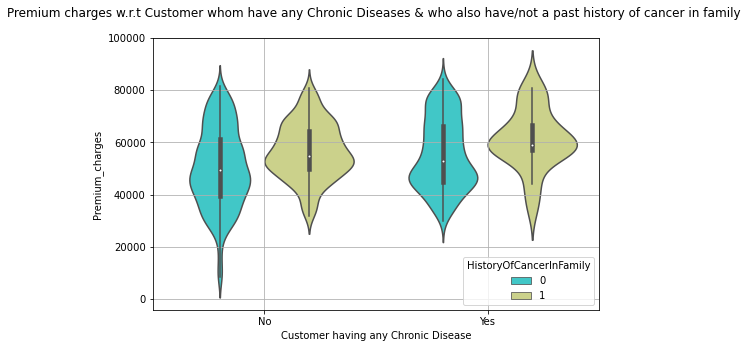


 The count of customers having any Chronic Diseases and/or past history of cancer in family:


HistoryOfCancerInFamily,0,1
Any_ChronicDiseases,,
0,856,269
1,375,55


In [24]:
#Visualising the Premium charges w.r.t Customer whom have any Chronic Diseases & who also have/not a past history of cancer in family 
plt.figure(figsize=(8,5))
sns.violinplot(x='Any_ChronicDiseases', y='Premium_charges', data=data, hue='HistoryOfCancerInFamily', palette='rainbow')
plt.title('Premium charges w.r.t Customer whom have any Chronic Diseases & who also have/not a past history of cancer in family \n')
plt.xlabel('Customer having any Chronic Disease')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.grid()
plt.show()

print('\n', '\x1B[1m'+'The count of customers having any Chronic Diseases and/or past history of cancer in family:'+'\x1B[0m')
pd.crosstab(data.Any_ChronicDiseases, data.HistoryOfCancerInFamily)

#### From above visual, we can say that 
* We have used a violin plot which is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. 

* The minimum premium charges for customers with no chronic disease & no history of cancer in family is comparatively lower compared to customers with history of cancer in family and/or suffering from any chronic disease.

* Around 55% customers didn't had any history of cancer in family and/or even suffer from any chronic disease.

* According to our data, approx. 3.6% customers has a past history of cancer in family & also suffering from a chronic disease.

## Data Pre-processing
* Transforming the categorical columns into numerical values using dummy variables method.

### Dummy Variables

In [588]:
#Transformed the categorical variables to dummy variables
data1 = pd.get_dummies(data, columns=['Sex', 'Smoker', 'Region'], drop_first=True)
data1

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Premium_charges,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,19,28,0,0,0,0,0,0,0,0,9887,0,0,0,0,1
1,27,34,1,1,0,0,0,0,0,0,34789,1,0,0,1,0
2,18,30,0,1,1,0,0,0,1,1,37000,0,0,0,1,0
3,18,16,0,1,1,0,0,0,1,1,37461,1,0,1,0,0
4,18,34,0,0,0,0,0,0,0,1,35000,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,30,23,1,1,0,1,1,1,1,0,57613,1,1,0,1,0
1551,31,26,2,1,0,1,1,1,1,0,58463,1,1,0,1,0
1552,33,25,3,1,0,1,1,1,1,0,59778,1,1,0,1,0
1553,29,22,1,1,0,1,1,1,1,0,57000,1,1,0,1,0


In [589]:
#Re-arranging the columns
data1 = data1[['Age', 'BMI', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_male', 'Smoker_yes', 
       'Region_northwest', 'Region_southeast', 'Region_southwest', 'Premium_charges']]
data1

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,Premium_charges
0,19,28,0,0,0,0,0,0,0,0,0,0,0,0,1,9887
1,27,34,1,1,0,0,0,0,0,0,1,0,0,1,0,34789
2,18,30,0,1,1,0,0,0,1,1,0,0,0,1,0,37000
3,18,16,0,1,1,0,0,0,1,1,1,0,1,0,0,37461
4,18,34,0,0,0,0,0,0,0,1,1,0,1,0,0,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,30,23,1,1,0,1,1,1,1,0,1,1,0,1,0,57613
1551,31,26,2,1,0,1,1,1,1,0,1,1,0,1,0,58463
1552,33,25,3,1,0,1,1,1,1,0,1,1,0,1,0,59778
1553,29,22,1,1,0,1,1,1,1,0,1,1,0,1,0,57000


### Visualising the distribution of dataset

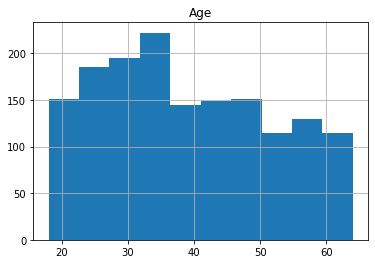

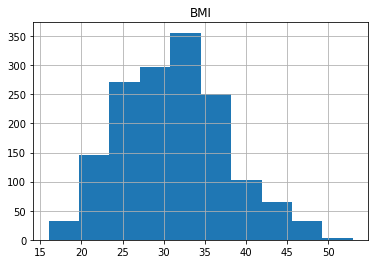

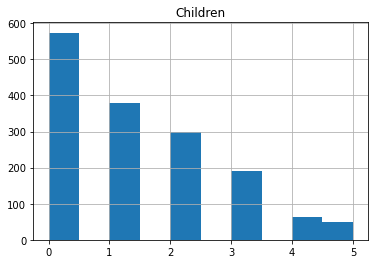

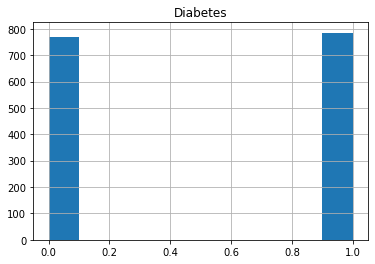

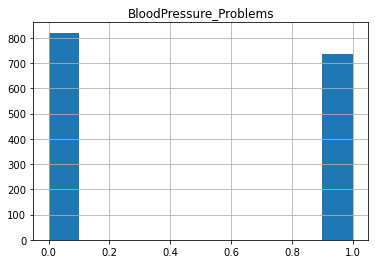

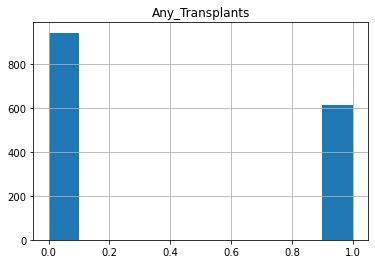

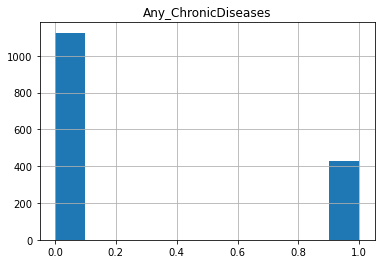

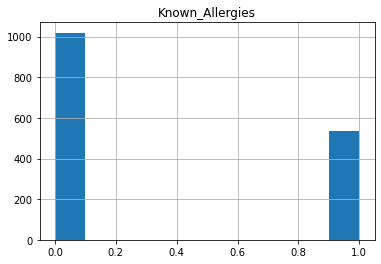

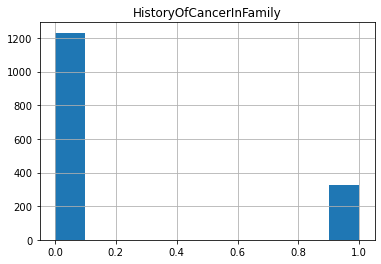

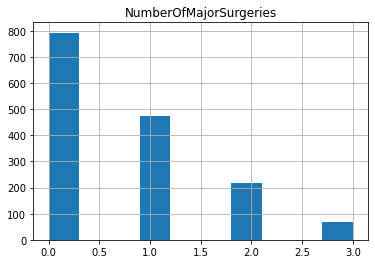

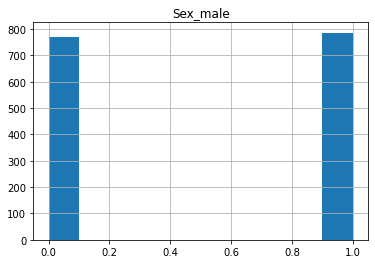

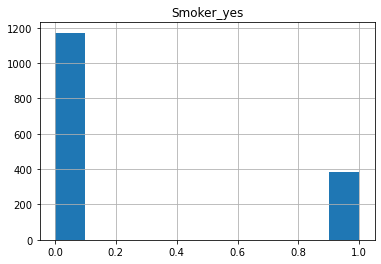

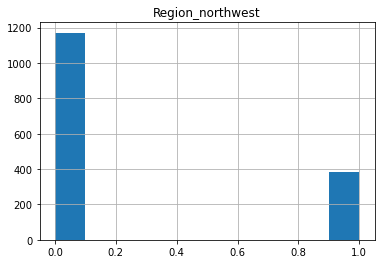

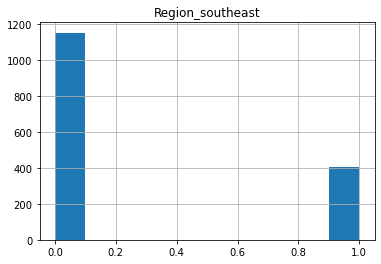

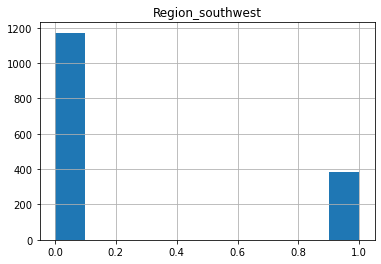

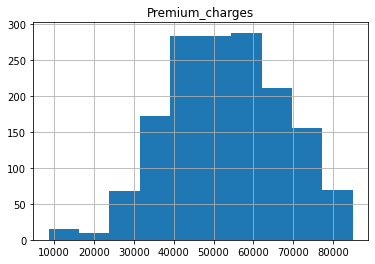

In [590]:
#Checking the distribution of our entire dataset
col = data1.columns
for i in col:
    data1.hist(i)
    plt.title(i)
    plt.show()

#### From above analysis,
* We can say that distribution is fairly symmetrical only for 3 features viz Age, BMI & Premium Charges.
* Rest, all features have a binary or ordinal values.

### Visualising the outliers in the dataset

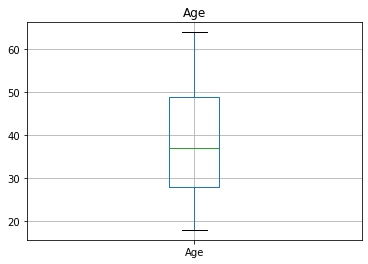

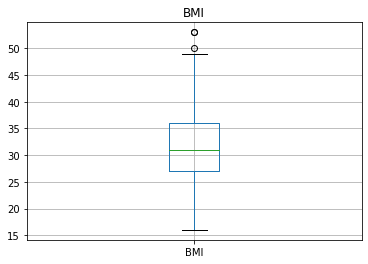

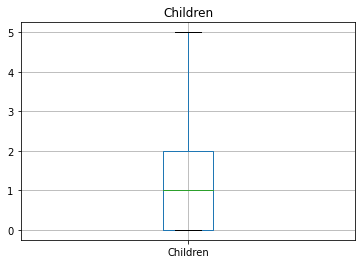

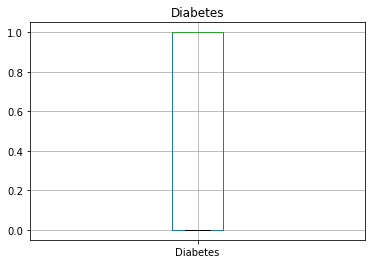

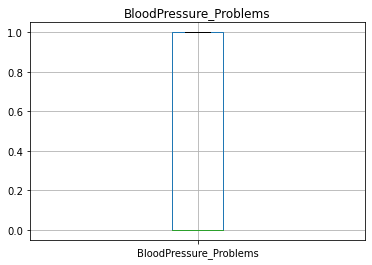

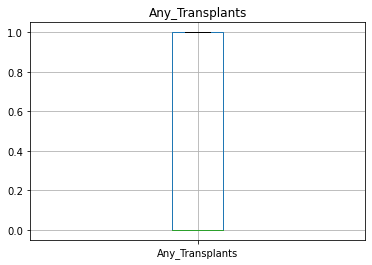

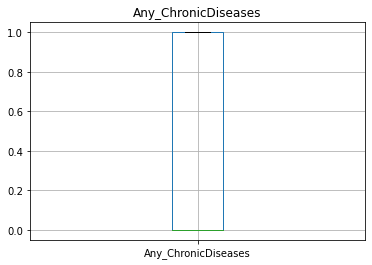

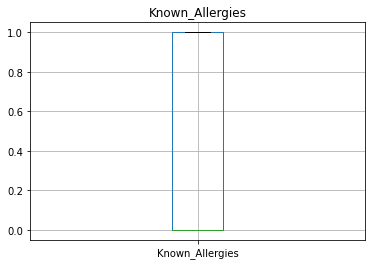

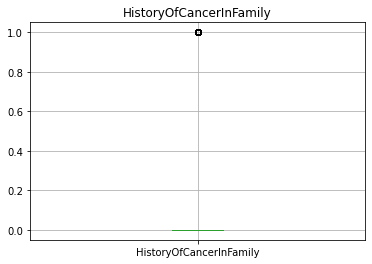

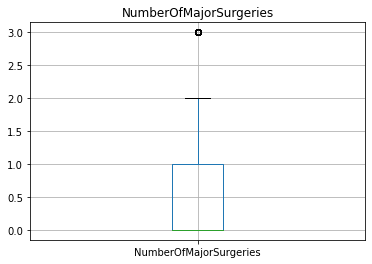

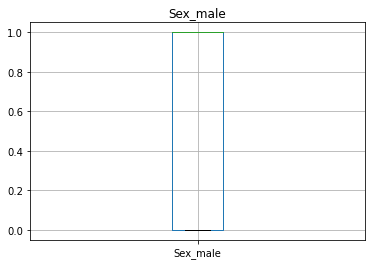

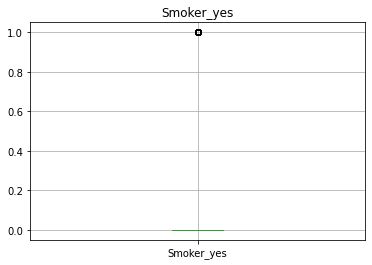

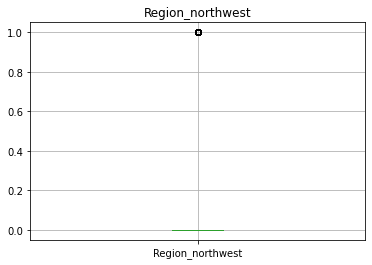

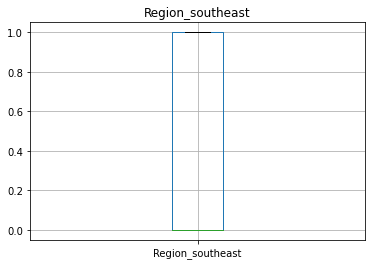

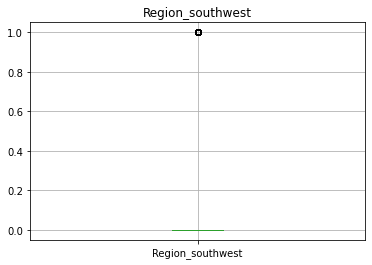

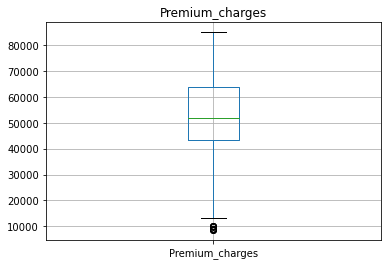

In [591]:
#Checking the outliers in our entire dataset
col = data1.columns
for i in col:
    data1.boxplot(i)
    plt.title(i)
    plt.show()

#### From above visuals, we can say that
* BMI & Premium charges has some outliers which is represented as circle.
* Other features, which is having circles are basically the other data value which is comparatively less in number.

### Visualising the linear relationship between Independent & dependant variables of dataset

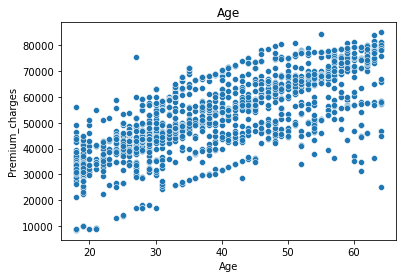

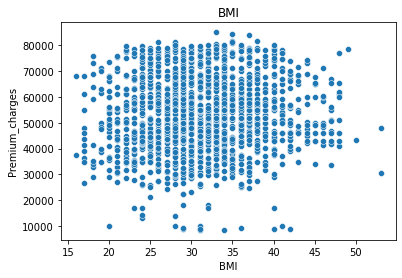

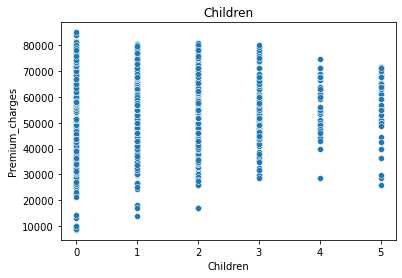

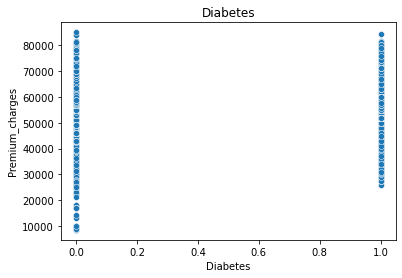

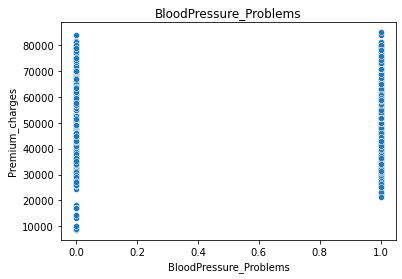

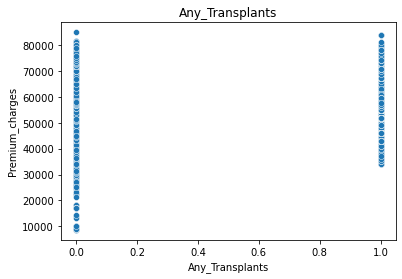

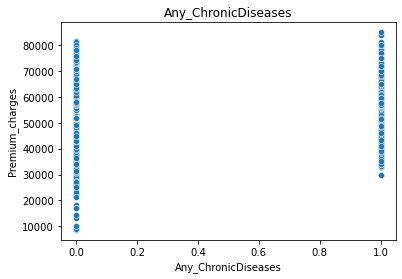

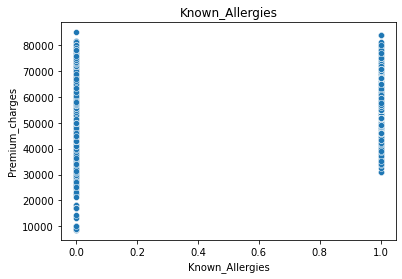

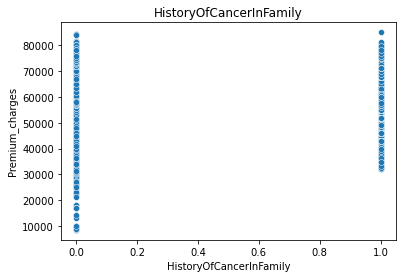

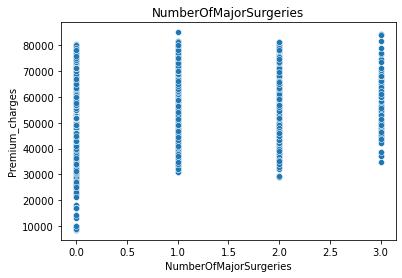

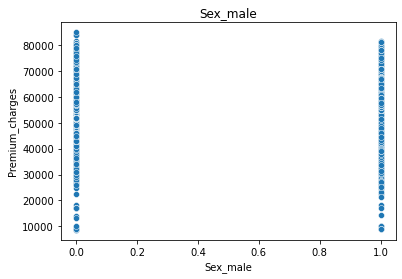

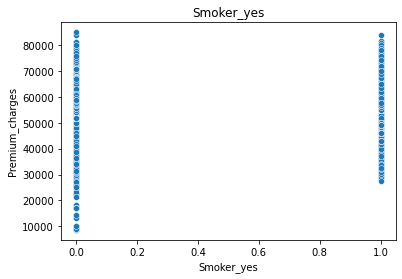

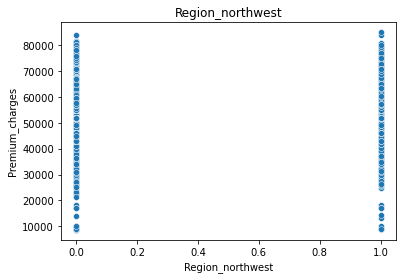

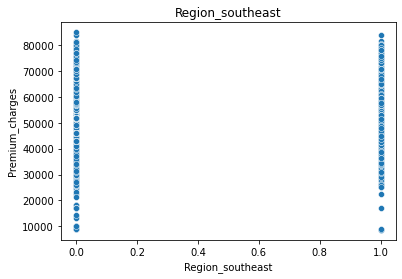

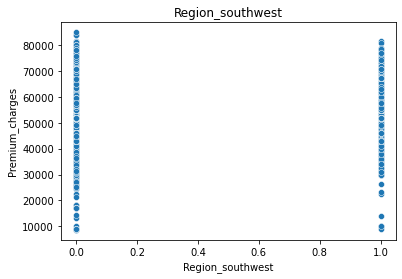

In [592]:
#Checking the linear relationship among variables of our dataset using scatter plot
cols = data1.columns[:-1]
for i in cols:
    sns.scatterplot(x=data1[i], y=data1.iloc[:, -1])
    plt.title(i)
    plt.show()

#### From above analysis,
* We can say that only Age follows a positive correlation with Premium charges.
* All other features except Age, due to binary or ordinal values no linear relationship exists between features & target variable.
* Since, our first assumption failed i.e. Linearity test; hence cannot perform OLS method for predicting target variable. (We have still performed using OLS just to examine how scores are impacted if assumptions are not satisfied).

### Feature Scaling
* Normalizing the features for model building

In [593]:
#Normalizing the features using Standard scaler to bring features on a similar scale. 
rs = StandardScaler()
data2 = rs.fit_transform(data1.iloc[:, :-1])

In [594]:
#Reviewing the data
data2.shape

(1555, 15)

In [595]:
#Converting scaled array values into a DataFrame
data1.columns
data2 = pd.DataFrame(data=data2, columns=data1.columns[:-1])

In [596]:
#DataFrame with scaled features
data2

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest
0,-1.558344,-0.500342,-0.975534,-1.009693,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,-0.830592,-1.010993,-0.571657,-0.572647,-0.593442,1.749300
1,-0.933580,0.431991,-0.235195,0.990400,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,-0.830592,0.989127,-0.571657,-0.572647,1.685083,-0.571657
2,-1.636440,-0.189564,-0.975534,0.990400,1.056242,-0.805601,-0.618241,-0.725263,1.949201,0.322596,-1.010993,-0.571657,-0.572647,1.685083,-0.571657
3,-1.636440,-2.365007,-0.975534,0.990400,1.056242,-0.805601,-0.618241,-0.725263,1.949201,0.322596,0.989127,-0.571657,1.746276,-0.593442,-0.571657
4,-1.636440,0.431991,-0.975534,-1.009693,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,0.322596,0.989127,-0.571657,1.746276,-0.593442,-0.571657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,-0.699294,-1.277286,-0.235195,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657
1551,-0.621198,-0.811119,0.505145,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657
1552,-0.465007,-0.966508,1.245484,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657
1553,-0.777389,-1.432674,-0.235195,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657


In [597]:
#Concatenate scaled features with target variable 
data2 = pd.concat([data2, data1.iloc[:, -1]], axis=1)

In [598]:
#DataFrame with scaled features & target variable
data2

,Age,BMI,Children,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,Premium_charges
0,-1.558344,-0.500342,-0.975534,-1.009693,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,-0.830592,-1.010993,-0.571657,-0.572647,-0.593442,1.749300,9887
1,-0.933580,0.431991,-0.235195,0.990400,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,-0.830592,0.989127,-0.571657,-0.572647,1.685083,-0.571657,34789
2,-1.636440,-0.189564,-0.975534,0.990400,1.056242,-0.805601,-0.618241,-0.725263,1.949201,0.322596,-1.010993,-0.571657,-0.572647,1.685083,-0.571657,37000
3,-1.636440,-2.365007,-0.975534,0.990400,1.056242,-0.805601,-0.618241,-0.725263,1.949201,0.322596,0.989127,-0.571657,1.746276,-0.593442,-0.571657,37461
4,-1.636440,0.431991,-0.975534,-1.009693,-0.946753,-0.805601,-0.618241,-0.725263,-0.513031,0.322596,0.989127,-0.571657,1.746276,-0.593442,-0.571657,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,-0.699294,-1.277286,-0.235195,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657,57613
1551,-0.621198,-0.811119,0.505145,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657,58463
1552,-0.465007,-0.966508,1.245484,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657,59778
1553,-0.777389,-1.432674,-0.235195,0.990400,-0.946753,1.241310,1.617492,1.378811,1.949201,-0.830592,0.989127,1.749300,-0.572647,1.685083,-0.571657,57000


## Model Building - OLS Method

### Model Building with all features

### Splitting the dataset

In [599]:
#Splitting the variables into features & target
X = data2.iloc[:, :-1]
y = data1.iloc[:, -1]

In [600]:
#Checking the shape of feature & target variable
X.shape, y.shape

((1555, 15), (1555,))

### Fitting & training model using statsmodel

In [601]:
#Building model including all features w.r.t target variable
model = smf.ols(formula='Premium_charges ~ Age + BMI + Children + Diabetes + BloodPressure_Problems + Any_Transplants + Any_ChronicDiseases + Known_Allergies + HistoryOfCancerInFamily + NumberOfMajorSurgeries + Sex_male + Smoker_yes + Region_northwest + Region_southeast + Region_southwest', data=data2).fit()

In [602]:
#Checking the intercept & co-efficients
model.params

Intercept                  52943.433441
Age                        10892.344275
BMI                          552.221360
Children                    -452.271284
Diabetes                    3358.995321
BloodPressure_Problems      1081.195331
Any_Transplants             1620.973258
Any_ChronicDiseases         1229.679037
Known_Allergies             2026.094675
HistoryOfCancerInFamily     2439.124381
NumberOfMajorSurgeries      1785.563394
Sex_male                     387.772562
Smoker_yes                   803.845361
Region_northwest             -29.707877
Region_southeast            -115.242756
Region_southwest              36.843071
dtype: float64

In [603]:
#Reviewing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Premium_charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     278.6
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:50:09   Log-Likelihood:                -16072.
No. Observations:                1555   AIC:                         3.218e+04
Df Residuals:                    1539   BIC:                         3.226e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.294e+04    190.110    278.488      0.000    5.26e+04    5.33e+04
Age                      1.089e+04    194.172     56.096      0.000    1.05e+04    1.13e+04
BMI                       552.2214    193.826      2.849      0.004     172.030     932.413
Children                 -452.2713    209.189     -2.162      0.031    -862.597     -41.946
Diabetes                 3358.9953    202.285     16.605      0.000    2962.212    3755.779
BloodPressure_Problems   1081.1953    196.105      5.513      0.000     696.535    1465.856
Any_Transplants          1620.9733    225.704      7.182      0.000    1178.253    2063.693
Any_ChronicDiseases      1229.6790    223.027      5.514      0.000     792.210    1667.148
Known_Allergies          2026.0947    225.029      9.004      0.000    1584.699    2467.491
HistoryOfCancerInFamily  2439.1244    228.538     10.673      0.000    1990.845    2887.404
NumberOfMajorSurgeries   1785.5634    218.448      8.174      0.000    1357.075    2214.052
Sex_male                  387.7726    194.808      1.991      0.047       5.655     769.891
Smoker_yes                803.8454    196.607      4.089      0.000     418.199    1189.491
Region_northwest          -29.7079    234.222     -0.127      0.899    -489.137     429.721
Region_southeast         -115.2428    236.974     -0.486      0.627    -580.069     349.583
Region_southwest           36.8431    234.125      0.157      0.875    -422.395     496.081
==============================================================================
Omnibus:                      256.620   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.799
Skew:                          -0.902   Prob(JB):                    6.41e-138
Kurtosis:                       5.549   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note:
* Above Model's accuracy is around 73% (adjusted r2 score). Also the p-values for Region_northwest, Region_southeast & Region_southwest are insignificant. We will check their individual contribution to target variable, if found significant will retain else remove them.  

* Let's check the model's validity/assumptions & transform it to improve performance. 

In [604]:
#Building model w.r.t insignificant feature Region_northwest
modelt = smf.ols(formula='Premium_charges ~ Region_northwest', data=data2).fit()

In [605]:
#Checking the respective p-value
modelt.pvalues

Intercept           0.000000
Region_northwest    0.663837
dtype: float64

In [606]:
#Building model w.r.t insignificant feature Region_southeast
modelt1 = smf.ols(formula='Premium_charges ~ Region_southeast', data=data2).fit()

In [607]:
#Checking the respective p-value
modelt1.pvalues

Intercept           0.000000
Region_southeast    0.888683
dtype: float64

In [608]:
#Building model w.r.t insignificant feature Region_southwest
modelt2 = smf.ols(formula='Premium_charges ~ Region_southwest', data=data2).fit()

In [609]:
#Checking the respective p-value
modelt2.pvalues

Intercept           0.000000
Region_southwest    0.645928
dtype: float64

In [610]:
#Building model w.r.t insignificant features Region_northwest, Region_southeast & Region_southwest
modelt3 = smf.ols(formula='Premium_charges ~ Region_northwest + Region_southeast + Region_southwest', data=data2).fit()

In [611]:
#Checking the respective p-value
modelt3.pvalues

Intercept           0.000000
Region_northwest    0.869860
Region_southeast    0.851068
Region_southwest    0.700737
dtype: float64

#### As from above analysis of p-values for Region_northwest, Region_southeast, Region_southwest found to be insignificant. Hence, we can safely drop them from further analysis.

#### Note:
* Let's try build a model dropping above insignificant features and check the adjusted r2 scores and p-values.

In [612]:
#Including only significant variables
df = data2.loc[:, ['Age', 'BMI', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_male',
       'Smoker_yes', 'Premium_charges']]

In [613]:
#Building model including only significant features w.r.t target variable
model1 = smf.ols(formula='Premium_charges ~ Age + BMI + Children + Diabetes + BloodPressure_Problems + Any_Transplants + Any_ChronicDiseases + Known_Allergies + HistoryOfCancerInFamily + NumberOfMajorSurgeries + Sex_male + Smoker_yes', data=df).fit()

In [614]:
#Reviewing the summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Premium_charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     348.8
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:50:11   Log-Likelihood:                -16073.
No. Observations:                1555   AIC:                         3.217e+04
Df Residuals:                    1542   BIC:                         3.224e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5.294e+04    189.953    278.718      0.000    5.26e+04    5.33e+04
Age                      1.089e+04    193.973     56.142      0.000    1.05e+04    1.13e+04
BMI                       549.0273    193.327      2.840      0.005     169.815     928.240
Children                 -450.4052    208.983     -2.155      0.031    -860.327     -40.483
Diabetes                 3357.8930    202.007     16.623      0.000    2961.656    3754.130
BloodPressure_Problems   1084.5872    195.632      5.544      0.000     700.855    1468.319
Any_Transplants          1630.5759    224.602      7.260      0.000    1190.017    2071.134
Any_ChronicDiseases      1215.7817    221.725      5.483      0.000     780.867    1650.696
Known_Allergies          2023.1687    224.570      9.009      0.000    1582.674    2463.664
HistoryOfCancerInFamily  2444.1615    228.156     10.713      0.000    1996.633    2891.690
NumberOfMajorSurgeries   1789.8668    217.815      8.217      0.000    1362.621    2217.113
Sex_male                  384.1652    194.362      1.977      0.048       2.924     765.406
Smoker_yes                797.2281    196.200      4.063      0.000     412.380    1182.076
==============================================================================
Omnibus:                      256.996   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.275
Skew:                          -0.903   Prob(JB):                    3.06e-138
Kurtosis:                       5.553   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Note:
* As we can see, there's a negligible contribution of 3 features to our model, as there's no improvement in model's performance.
* Considering the p-values of other features they seem to be significant. 
* Hence, we had correctly removed the insignificant features.

### OLS Method - Assumption Check
* Linearity Test
* No endogenity
* Normality & Homoscedasticity
* No Multi-collinearity
* No Auto Regression

#### Linearity test
* It basically mean that the data follow a linear pattern. Although, the data do not have to be in a perfect line, they should follow a positive or negative slope for the most part.

**Note:**
* We have already performed linearity test using scatter plot, hence our dataset failed in linearity test as most of the independent variables is not having any linear relationship with the target variable.

#### Normality, Zero residual Mean & Homoscedasticity
* Normality means the error term is normally distributed. The expected value of the error is 0, as we expect to have no errors on average.  

* The coefficients estimate the parameters while the residuals estimate the error term. Ideally, the error term has a zero mean and are independent of each other. 

* Homoscedasticity, in plain English, means constant variance or to have an equal variance. So, the error terms should have equal variance one with the other.

**Test for Normality of Residuals (Q-Q Plot)**

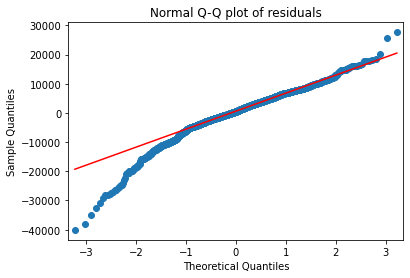

In [615]:
#Visualising the distribution of errors
sm.qqplot(model1.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

##### From above visual, we can say that
* The bottom end of the Q-Q plot deviates from the straight line but the upper end is not, then we can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed).
* It means the errors are not normally distributed.
* Hence, Normality test failed.

**Test for Homoscedasticity**
* Plotting model's standardized fitted values vs standardized residual values.

In [53]:
#Defined a function for standardizing the values
def standardised_values(val):
    return (val - val.mean())/val.std()            # User defined z = (x - mu)/sigma

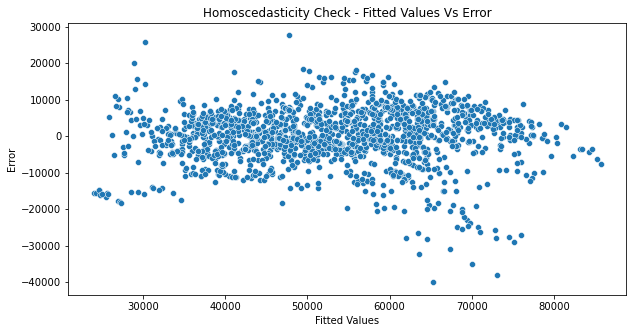

In [54]:
#Visualising the Test for Homoscedasticity or Heteroscedasticity using scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=model1.fittedvalues, y=model1.resid)
plt.title('Homoscedasticity Check - Fitted Values Vs Error')
plt.xlabel('Fitted Values')
plt.ylabel('Error')
plt.show()

##### From above analysis, we can say that
* The variance between errors is highly distributed, and not constant.
* Hence, we can clearly say there is heteroscedasticity, hence test of homoscedasticity failed.

#### No Multi-collinearity
* Multicollinearity is observed when two or more independent variables have a high correlation between each other.

**Note:**
* Correlation Matrix Analysis
* Variance Inflation Factor (VIF)

In [55]:
#Correlation Matrix Analysis of Features w.r.t Premium_Charges
corr_data = data1.corr()['Premium_charges'].round(2)
corr_data

Age                        0.71
BMI                        0.07
Children                   0.12
Diabetes                   0.26
BloodPressure_Problems     0.08
Any_Transplants            0.20
Any_ChronicDiseases        0.14
Known_Allergies            0.23
HistoryOfCancerInFamily    0.16
NumberOfMajorSurgeries     0.20
Sex_male                   0.10
Smoker_yes                 0.05
Region_northwest           0.01
Region_southeast          -0.00
Region_southwest          -0.01
Premium_charges            1.00
Name: Premium_charges, dtype: float64

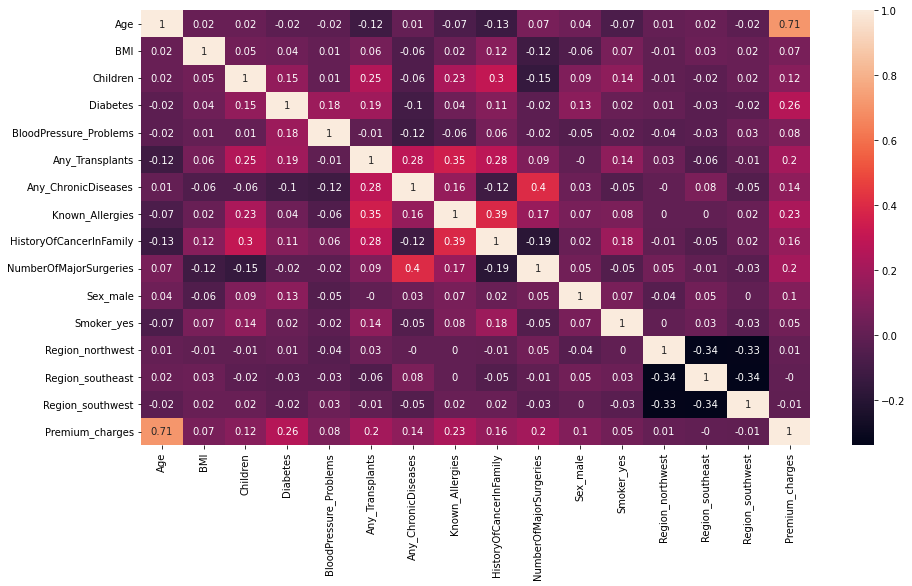

In [56]:
#Visualizing the correlation using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr().round(2), annot=True)
plt.show()

##### From above visual, we can say that 
* There's no Multicollinearity in the dataset among independent variables except Transplant & Allergies, Cancer & Allergies, Surgeries & Chronic diseases.
* Age seems to be highly influential variable for predicting the Premium charges. There exists a high correlation between age & premium charges.
* Other variables such as Diabetes, Transplants, Allergies, Surgeries, etc., are also positively correlated to Premium charges. 

#### Variance Inflation Factor (VIF)
* A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.
* In general, a VIF above 10 indicates high correlation and is cause for concern.

In [57]:
#Forming a new dataframe
df1 = df.iloc[:, :-1]

In [58]:
#Check for the VIF values of the feature variables
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ignore_index=True)
vif

,Features,VIF
0,BMI,1.04
1,Age,1.05
2,Children,1.27
3,Smoker_yes,1.35
4,BloodPressure_Problems,1.59
5,Diabetes,1.76
6,HistoryOfCancerInFamily,1.80
7,Sex_male,1.81
8,Any_ChronicDiseases,1.87
9,NumberOfMajorSurgeries,2.06


##### From above VIF analysis, we can say that 
* There's no Multicollinearity in the dataset among independent variables.
* All variables VIFs are below the threshold of 10.
* Hence, we can include all variables for model buidling. 

#### No endogenity
* It refers to the prohibition of a link (no relationship should exists) between the independent variables and the errors.
* Using Residual Regression Plots

eval_env: 1


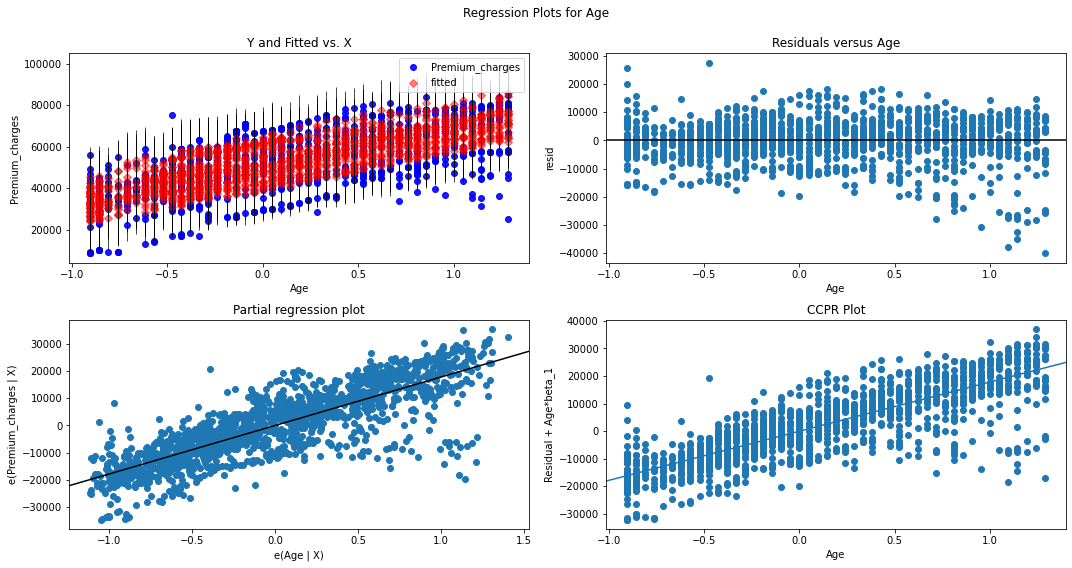

In [59]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Age', fig = fig)
plt.show()

eval_env: 1


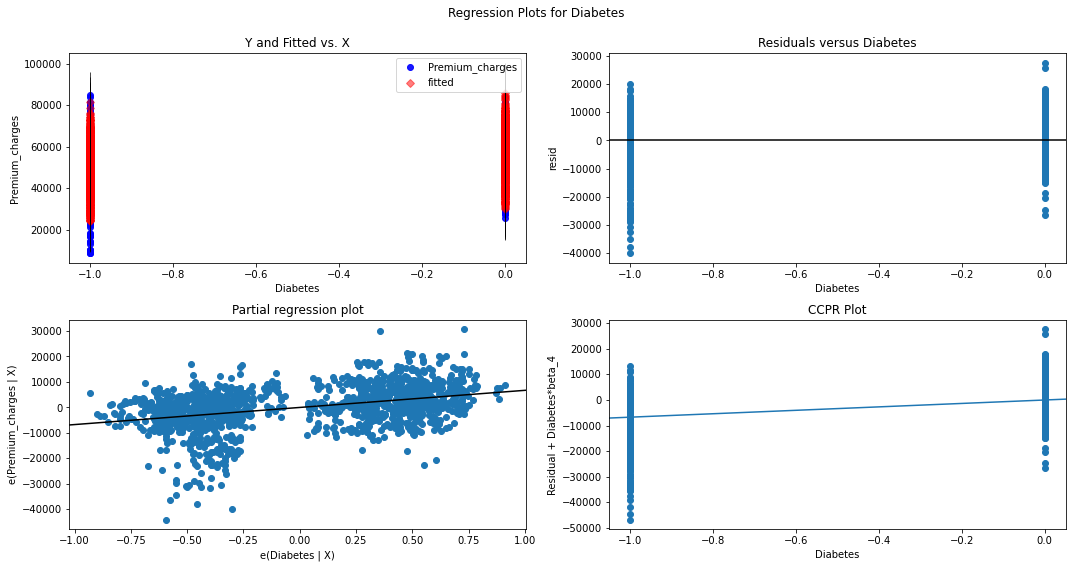

In [60]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Diabetes', fig = fig)
plt.show()

eval_env: 1


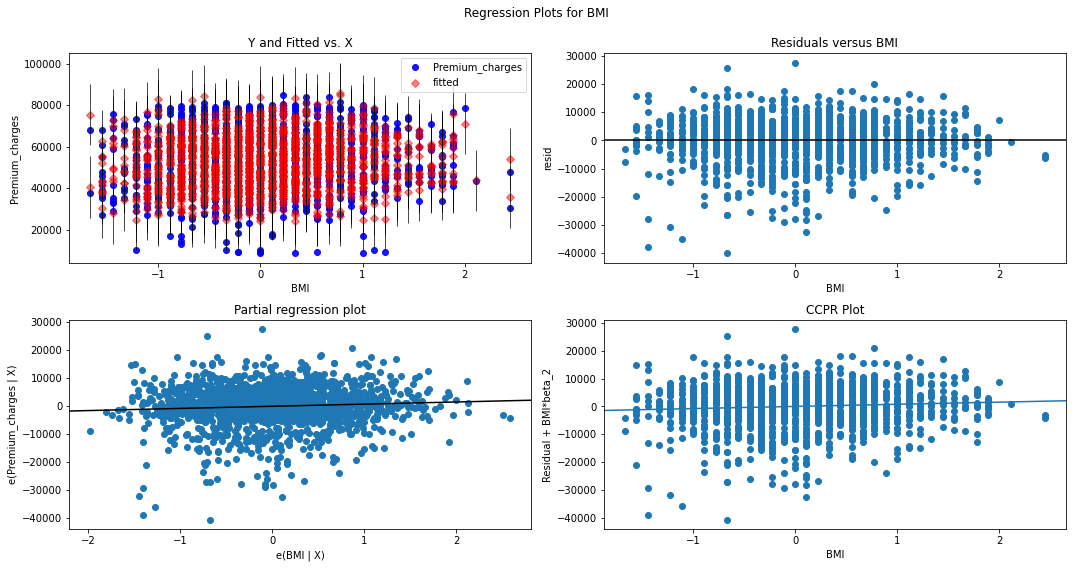

In [61]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'BMI', fig = fig)
plt.show()

eval_env: 1


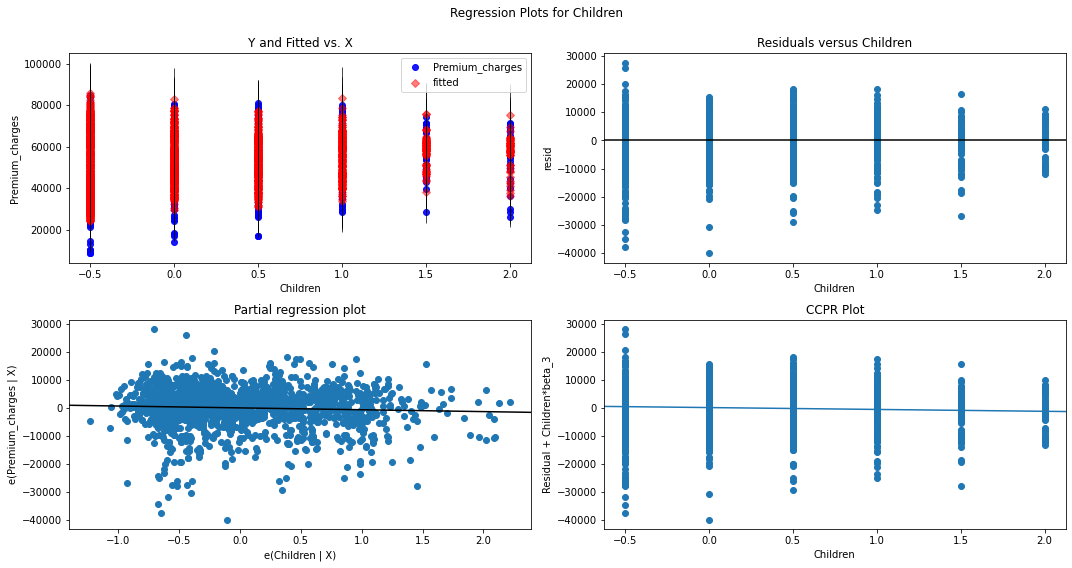

In [62]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Children', fig = fig)
plt.show()

eval_env: 1


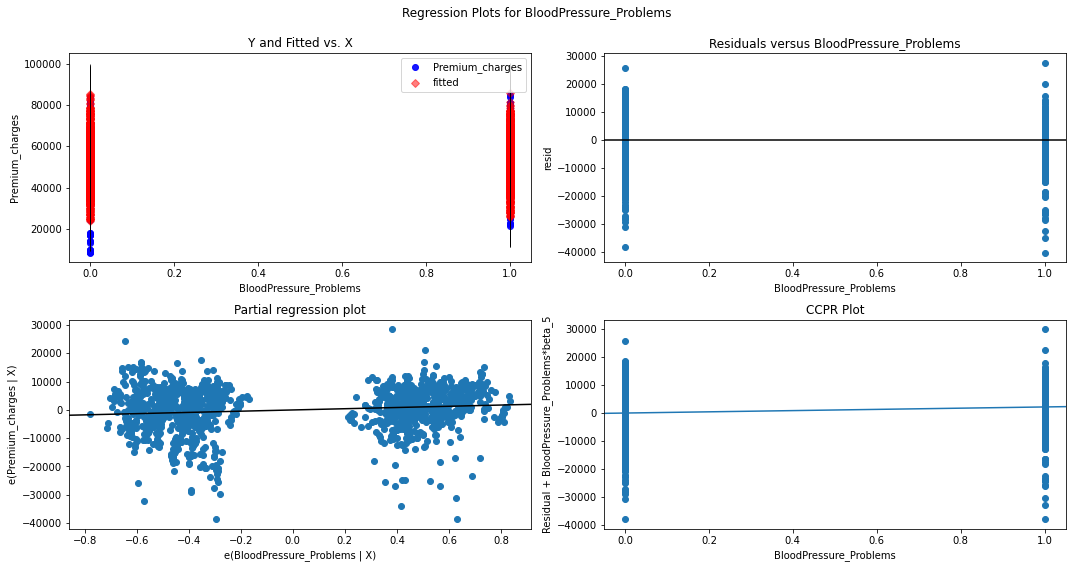

In [63]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'BloodPressure_Problems', fig = fig)
plt.show()

eval_env: 1


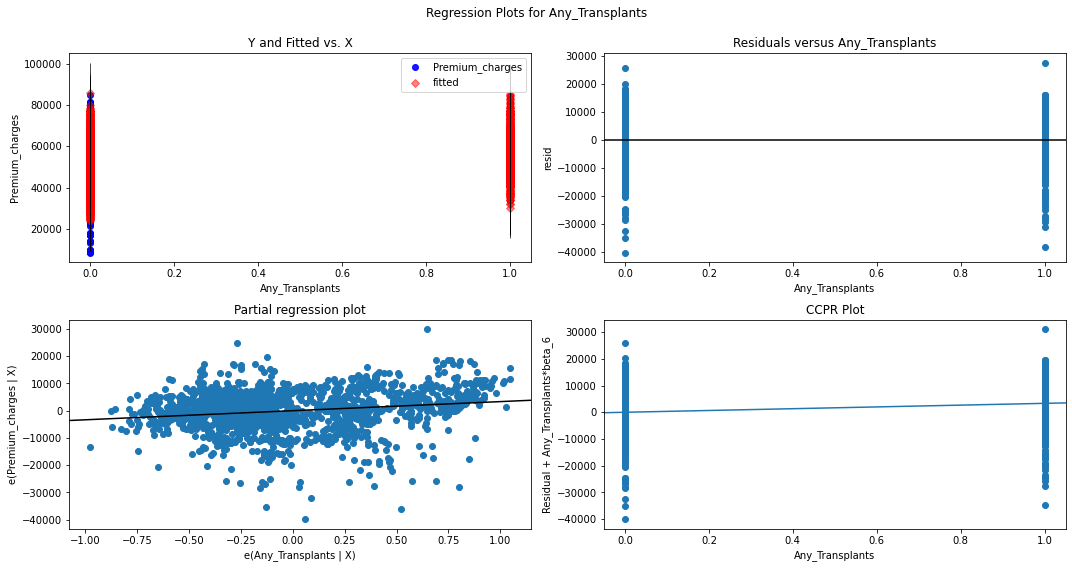

In [64]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Any_Transplants', fig = fig)
plt.show()

eval_env: 1


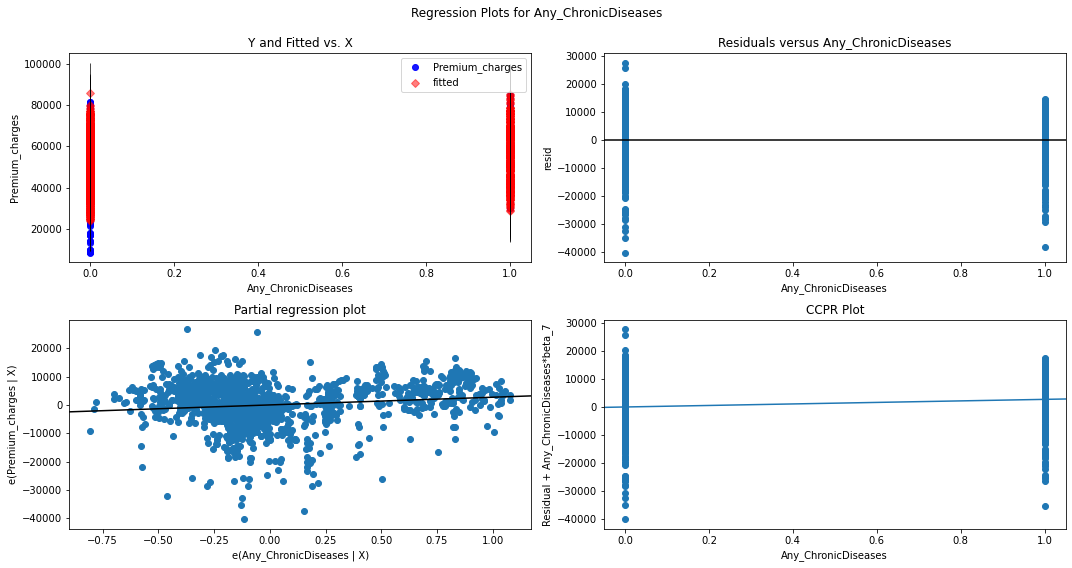

In [65]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Any_ChronicDiseases', fig = fig)
plt.show()

eval_env: 1


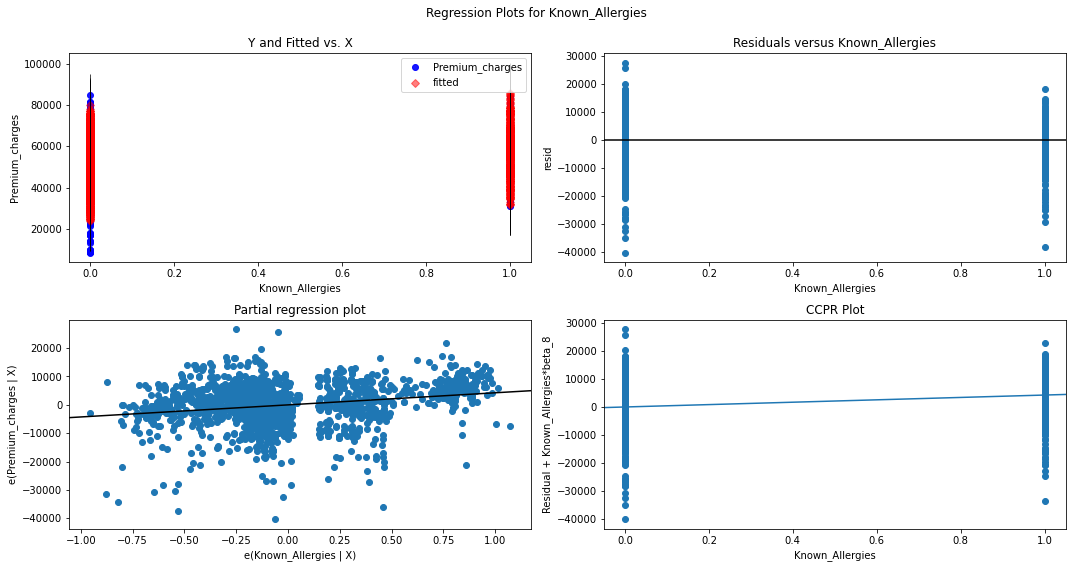

In [66]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Known_Allergies', fig = fig)
plt.show()

eval_env: 1


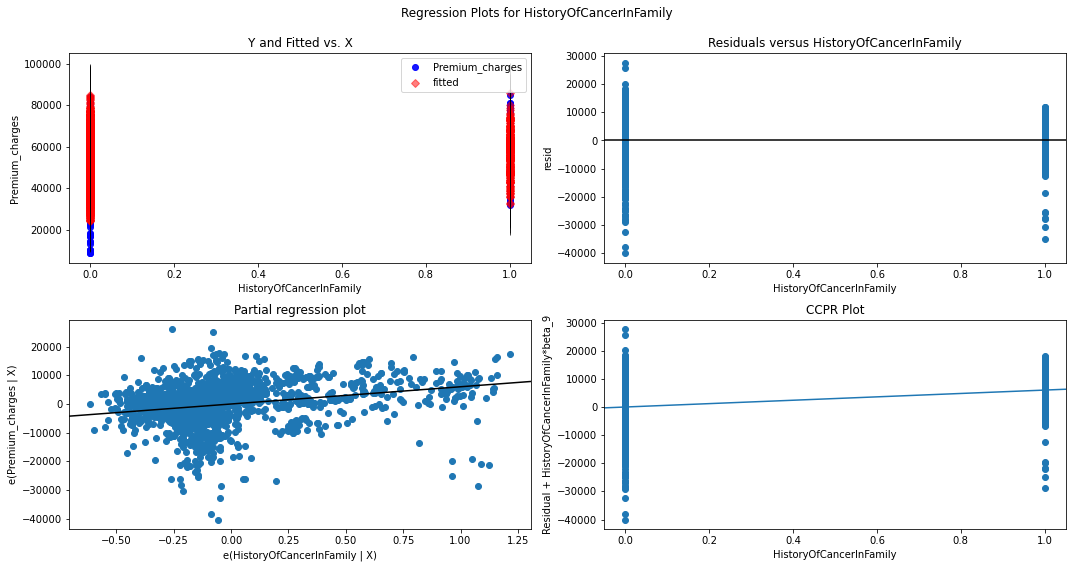

In [67]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'HistoryOfCancerInFamily', fig = fig)
plt.show()

eval_env: 1


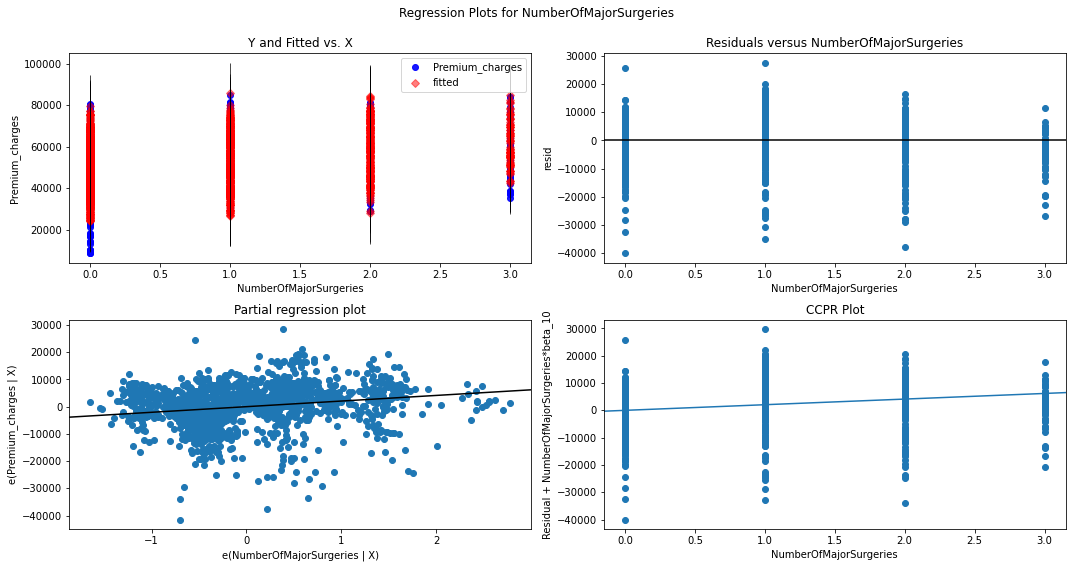

In [68]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'NumberOfMajorSurgeries', fig = fig)
plt.show()

eval_env: 1


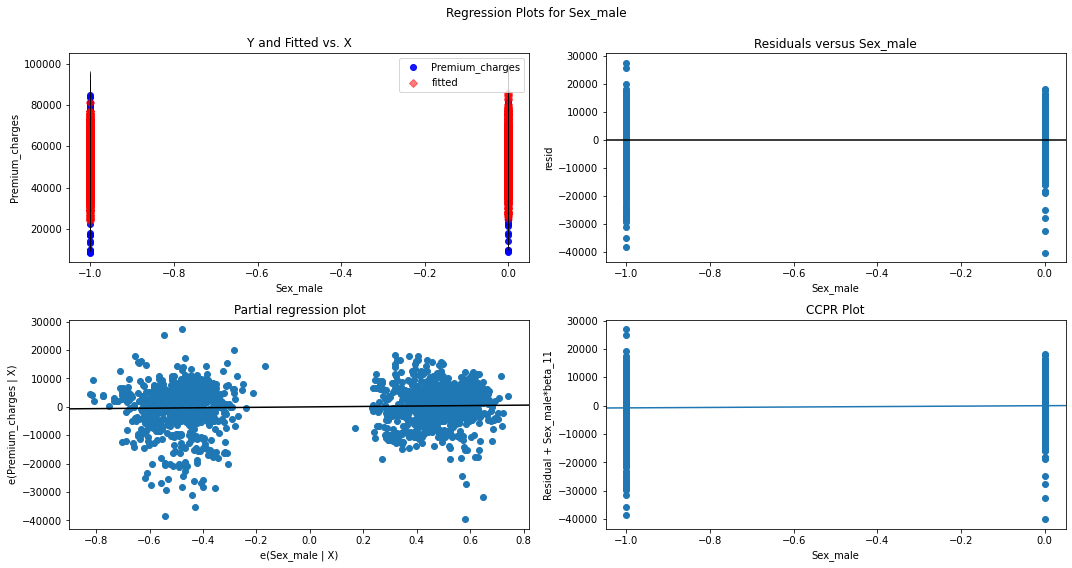

In [69]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Sex_male', fig = fig)
plt.show()

eval_env: 1


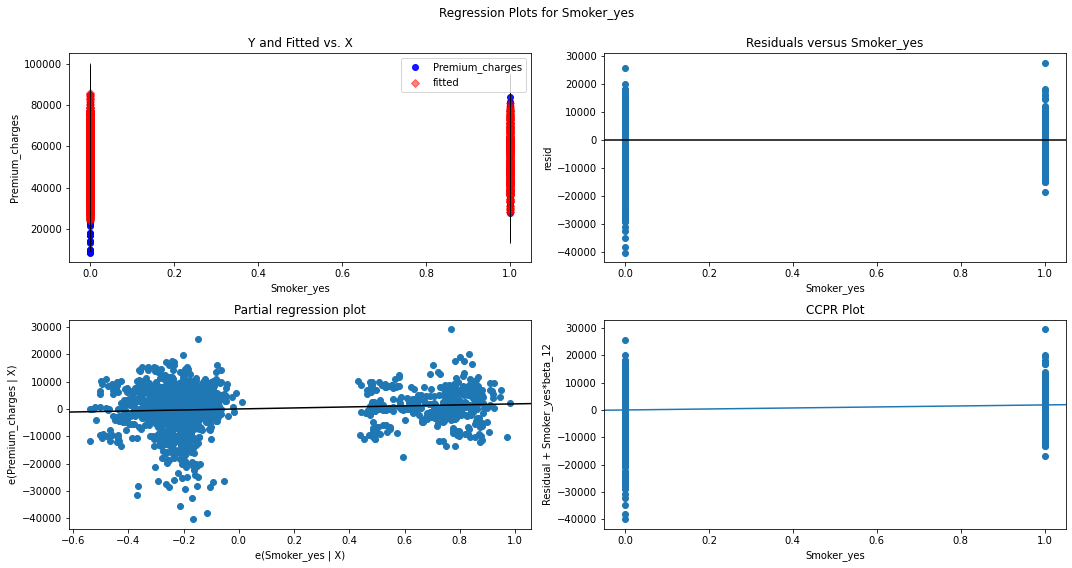

In [70]:
#Visualising Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors using Residual Regression Plots
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model1, 'Smoker_yes', fig = fig)
plt.show()

##### From above visuals, we can say that
* The Component-Component plus Residual (CCPR) plot provides another way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. They are also a good way to see if the predictors have a linear relationship with the dependent variable.
* Partial regression plots attempt to show the effect of adding an additional variable to the model (given that one or more independent variables are already in the model).
* There exists no relation of independent variables with errors. 
* Hence, there's no endogenity.

#### No Auto Regression
* As there is no time based inputs in given data. 

### Model Deletion Diagnostics (checking Outliers or Influencers)
* 1. Cook's Distance 
* 2. Leverage value

In [71]:
#Calculating the cook's distance
(c,_) = model1.get_influence().cooks_distance
c

array([1.62501002e-03, 1.26273978e-04, 2.27564659e-04, ...,
       1.91950761e-05, 1.52360348e-05, 2.01349746e-05])

In [72]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
np.round(leverage_cutoff*100, 2)

2.7

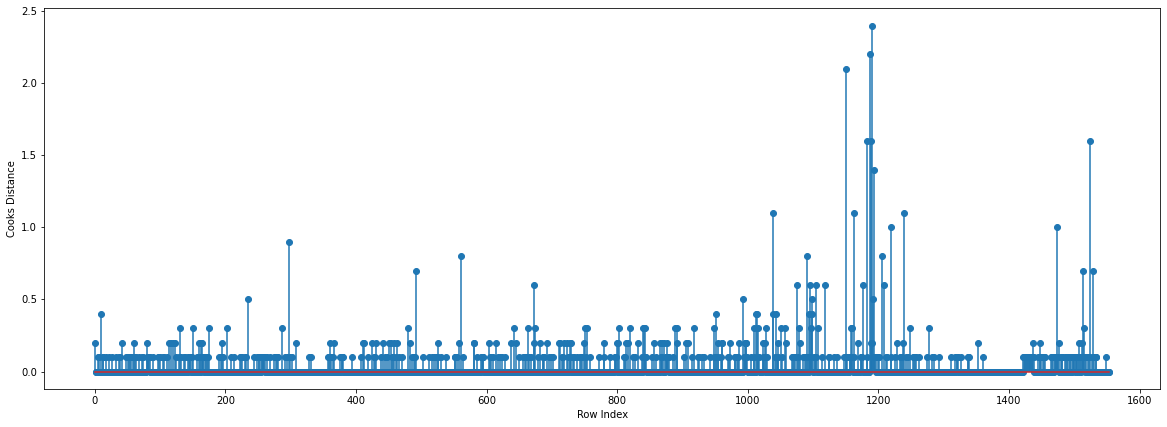

In [73]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3)*100)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### From above visuals, we can say that
* As we can see, the datapoints are quite low and cannot be treated as outliers as per leverage value.
* Hence, we are keeping all the data points as per cook's distance method.
* We have performed Regression Analysis using OLS method (just to see how model performs when assumption is violated), but results were not satisfactory. 
* Thus, we will go ahead with Sklearn Regression Models.

## Model Building - Using Sklearn

### Model Building with all features

In [616]:
#Checking the shape of target & feature variable
X.shape, y.shape

((1555, 15), (1555,))

In [617]:
#Segregating data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.33)

In [618]:
#Checking the shape of feature train & test variables
X_train.shape, X_test.shape

((1041, 15), (514, 15))

In [619]:
#Checking the shape of target train & test variables
y_train.shape, y_test.shape

((1041,), (514,))

In [620]:
#Building the different regression models with default parameters
lr = LinearRegression(normalize=False)
rf = RandomForestRegressor(random_state=0)
gb = GradientBoostingRegressor(random_state=0)
dt = DecisionTreeRegressor(random_state=0)

### Model Training with above base models

In [621]:
%%time
lr_mod = lr.fit(X_train, y_train)
dt_mod = dt.fit(X_train, y_train)
rf_mod = rf.fit(X_train, y_train)
gb_mod = gb.fit(X_train, y_train)

CPU times: total: 641 ms
Wall time: 500 ms


### Model Testing & Evaluation

In [622]:
%%time
y_pred_lr = lr_mod.predict(X_test)
y_pred_dt = dt_mod.predict(X_test)
y_pred_rf = rf_mod.predict(X_test)
y_pred_gb = gb_mod.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 28.9 ms


### Analysing the model performance & accuracy

In [623]:
#Testing the r2 score for all models
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('R2 Scores for all models','\n')

for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(r2_score(y_test, i)*100, 2))
    print('============================', '\n')

R2 Scores for all models 

Linear Regression : 73.86

Decision Tree : 77.7

Random Forest : 86.63

Gradient Boost : 83.64



In [624]:
#Testing the Adjusted r2 score for all models
n = 1555
k = 15
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Adjusted R2 Scores for all models','\n')

def Adjustedr2score(y_test, y_pred):
    R2 = r2_score(y_test, y_pred)
    no_observations = n
    no_features = k
    Adjusted_R2 = 1 - (1 - R2)*(n-1) / (n-k-1)
    return Adjusted_R2
    
for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(Adjustedr2score(y_test, i)*100, 2))
    print('============================', '\n')    

Adjusted R2 Scores for all models 

Linear Regression : 73.61

Decision Tree : 77.49

Random Forest : 86.5

Gradient Boost : 83.48



In [625]:
#Testing the error using mean-absolute deviation (MAD)
cc  = [y_pred_lr, y_pred_dt, y_pred_rf, y_pred_gb]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Mean Absolute Deviation Error Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', np.round(mean_absolute_percentage_error(y_test, i)*100, 2))
    print('==========================', '\n')

Mean Absolute Deviation Error Scores for all models 

Linear Regression : 13.68

Decision Tree : 8.71

Random Forest : 7.53

Gradient Boost : 10.1



#### From above model evaluation,
* Adjusted R2 scores for models Random Forest & Gradient Boost was higher than 80% whereas Linear Regression & Decision Tree models scores was less than 80%.
* As per mean squared error scores, our goal is minimise it. Linear Regression & Gradient Boost models have error score greater than 10%. Random Forest & Decision Tree models error score is less than 10%.
* Hence, Random Forest model is performing comparatively better than other models with all features included.

### We build above models with all features taken into consideration to predict premium charges. Let's try building models considering only significant features to predict the premium charges. 

## Feature Engineering
* RFE feature selection method
* Select KBest Method

### RFE (Recursive Feature Elimination)

In [626]:
#Drawing Important features from Random Forest model using RFE 
rfe_rf  = RFE(rf_mod, n_features_to_select=None) 

In [627]:
rfe_rf.fit(X,y)

RFE(estimator=RandomForestRegressor(random_state=0))

In [628]:
#Important features as per Random Forest model
rfe_rf.get_feature_names_out(input_features=cols)

array(['Age', 'BMI', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Known_Allergies', 'NumberOfMajorSurgeries'],
      dtype=object)

In [629]:
#Drawing Important features from Gradient Boost model using RFE
rfe_gb  = RFE(gb_mod, n_features_to_select=None)

In [630]:
rfe_gb.fit(X,y)

RFE(estimator=GradientBoostingRegressor(random_state=0))

In [631]:
#Important features as per Gradient Boost model
rfe_gb.get_feature_names_out(input_features=cols)

array(['Age', 'Diabetes', 'BloodPressure_Problems', 'Any_Transplants',
       'Any_ChronicDiseases', 'Known_Allergies', 'NumberOfMajorSurgeries'],
      dtype=object)

In [632]:
#Drawing Important features from Decision Tree model using RFE
rfe_dt  = RFE(dt_mod, n_features_to_select=None)

In [633]:
rfe_dt.fit(X,y)

RFE(estimator=DecisionTreeRegressor(random_state=0))

In [634]:
#Important features as per Decision Tree model
rfe_dt.get_feature_names_out(input_features=cols)

array(['Age', 'BMI', 'Diabetes', 'Any_Transplants', 'Any_ChronicDiseases',
       'Known_Allergies', 'NumberOfMajorSurgeries'], dtype=object)

In [635]:
#Drawing Important features from Decision Tree model using RFE
rfe_lr  = RFE(lr_mod, n_features_to_select=None)

In [636]:
rfe_lr.fit(X,y)

RFE(estimator=LinearRegression(normalize=False))

In [637]:
#Important features as per Decision Tree model
rfe_lr.get_feature_names_out(input_features=cols)

array(['Age', 'Diabetes', 'Any_Transplants', 'Any_ChronicDiseases',
       'Known_Allergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries'], dtype=object)

In [638]:
#Comparing all the features from 3 models in a DataFrame
rfe_df = pd.DataFrame({'Random Forest' : rfe_rf.get_feature_names_out(input_features=cols),
                       'Gradient Boost' : rfe_gb.get_feature_names_out(input_features=cols),
                       'Decision Tree' : rfe_dt.get_feature_names_out(input_features=cols),
                       'Linear Regression' : rfe_lr.get_feature_names_out(input_features=cols)})
rfe_df

,Random Forest,Gradient Boost,Decision Tree,Linear Regression
0,Age,Age,Age,Age
1,BMI,Diabetes,BMI,Diabetes
2,Diabetes,BloodPressure_Problems,Diabetes,Any_Transplants
3,BloodPressure_Problems,Any_Transplants,Any_Transplants,Any_ChronicDiseases
4,Any_Transplants,Any_ChronicDiseases,Any_ChronicDiseases,Known_Allergies
5,Known_Allergies,Known_Allergies,Known_Allergies,HistoryOfCancerInFamily
6,NumberOfMajorSurgeries,NumberOfMajorSurgeries,NumberOfMajorSurgeries,NumberOfMajorSurgeries


#### From above RFE method based on all models,
* The important features common in all three models are found to be Age, Diabetes, Any_Transplants, Known_Allergies and NumberOfMajorSurgeries. Five significant features are common in all the 3 models. 
* We will consider above common 5 significant features & BloodPressure_Problems, Any_ChronicDiseases for model building and try to figure out the model's performance.

## Model Building after Feature Selection

### Model Building based on 7 significant features

In [639]:
#Selecting only 6 significant features for training
X_fi = data2.loc[:, ['Age', 'BloodPressure_Problems', 'Diabetes', 'Any_Transplants', 'Known_Allergies', 'Any_ChronicDiseases', 'NumberOfMajorSurgeries']]

In [640]:
#Splitting into train & test variables
X_train_fi, X_test_fi, y_train, y_test = train_test_split(X_fi, y, random_state=0, test_size=0.33)

In [641]:
#Size of train & test data
X_train_fi.shape, X_test_fi.shape, y_train.shape, y_test.shape

((1041, 7), (514, 7), (1041,), (514,))

In [642]:
#Building models with default parameters
rf_mod2 = RandomForestRegressor(random_state=0)
gb_mod2 = GradientBoostingRegressor(random_state=0)
dt_mod2 = DecisionTreeRegressor(random_state=0) 
lr_mod2 = LinearRegression(normalize=False)

### Model Training & Evaluation

In [643]:
%%time
rf_mod2.fit(X_train_fi, y_train)
gb_mod2.fit(X_train_fi, y_train)
dt_mod2.fit(X_train_fi, y_train)
lr_mod2.fit(X_train_fi, y_train)

CPU times: total: 172 ms
Wall time: 239 ms


LinearRegression(normalize=False)

### Model Testing & Evaluation

In [644]:
%%time
y_pred_rf2 = rf_mod2.predict(X_test_fi)
y_pred_gb2 = gb_mod2.predict(X_test_fi)
y_pred_dt2 = dt_mod2.predict(X_test_fi)
y_pred_lr2 = lr_mod2.predict(X_test_fi)

CPU times: total: 46.9 ms
Wall time: 21.5 ms


### Analysing the model performance & accuracy

In [645]:
#Testing the r2 score for all models
cc  = [y_pred_lr2, y_pred_dt2, y_pred_rf2, y_pred_gb2]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('R2 Scores for all models','\n')

for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(r2_score(y_test, i)*100, 2))
    print('============================', '\n')

R2 Scores for all models 

Linear Regression : 71.97

Decision Tree : 80.73

Random Forest : 87.09

Gradient Boost : 82.66



In [646]:
#Testing the Adjusted r2 score for all models
n = 1555
k = 7
cc  = [y_pred_lr2, y_pred_dt2, y_pred_rf2, y_pred_gb2]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Adjusted R2 Scores for all models','\n')

def Adjustedr2score(y_test, y_pred):
    R2 = r2_score(y_test, y_pred)
    no_observations = n
    no_features = k
    Adjusted_R2 = 1 - (1 - R2)*(n-1) / (n-k-1)
    return Adjusted_R2
    
for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(Adjustedr2score(y_test, i)*100, 2))
    print('============================', '\n')    

Adjusted R2 Scores for all models 

Linear Regression : 71.85

Decision Tree : 80.64

Random Forest : 87.03

Gradient Boost : 82.58



In [647]:
#Testing the mean-squared error (MAD)
cc  = [y_pred_lr2, y_pred_dt2, y_pred_rf2, y_pred_gb2]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Mean Absolute Deviation Error Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', np.round(mean_absolute_percentage_error(y_test, i)*100, 2))
    print('==========================', '\n')

Mean Absolute Deviation Error Scores for all models 

Linear Regression : 14.51

Decision Tree : 8.25

Random Forest : 7.31

Gradient Boost : 10.11



In [648]:
#Comparing Adjusted R2 Scores of the models  with all features vs models with significant features
print('Adjusted R2 scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'Model_significant_features'], 
                        
                        data={'Model_all_features': [np.round(Adjustedr2score(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb)*100, 2)],
                              
                      'Model_significant_features': [np.round(Adjustedr2score(y_test ,y_pred_lr2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb2)*100, 2)]
                                                     })
                                         

mod_comp['%Change in Scores'] = mod_comp['Model_significant_features'] - mod_comp['Model_all_features']

mod_comp.sort_values(by='%Change in Scores', ascending=False)

Adjusted R2 scores for all models


,Model_all_features,Model_significant_features,%Change in Scores
Decision Tree,77.60,80.64,3.04
Random Forest,86.57,87.03,0.46
Gradient Boost,83.56,82.58,-0.98
Linear Regression,73.74,71.85,-1.89


In [649]:
#Comparing MAD Error Scores of the models  with all features vs models with significant features
print('MAD scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'Model_significant_features'], 
                        
                        data={'Model_all_features': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb)*100, 2)],
                              
                      'Model_significant_features': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb2)*100, 2)]
                                                     })
                                         

mod_comp['%Change in Scores'] = mod_comp['Model_significant_features'] - mod_comp['Model_all_features']

mod_comp.sort_values(by='%Change in Scores', ascending=True)

MAD scores for all models


,Model_all_features,Model_significant_features,%Change in Scores
Decision Tree,8.71,8.25,-0.46
Random Forest,7.53,7.31,-0.22
Gradient Boost,10.10,10.11,0.01
Linear Regression,13.68,14.51,0.83


#### From above model evaluation,
* Adjusted R2 scores have dropped for Gradient Boost & Linear Regression models with 7 significant features when compared with same models including all features.
* Also, the error score has increased for Gradient Boost & Linear Regression models with 7 significant features when compared with same models including all features.
* As per RFE method, Random Forest & Decision Tree models with 7 significant features have performed well when compared with same models including all features.

### Select-k-Best (SKB)

In [650]:
#Drawing Important features from Select-k-Best method 
select_reg =  SelectKBest(score_func=f_regression)

In [651]:
select_reg.fit(X, y) 

SelectKBest(score_func=<function f_regression at 0x00000169CCAD00D0>)

In [652]:
#Important features as per Select-k-Best 
select_reg.get_feature_names_out(input_features=cols)

array(['Age', 'Children', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_male'],
      dtype=object)

#### From above Select-k-Best method,
* The important features are found to be Age, Diabetes, BloodPressure_Problems, Any_Transplants, Known_Allergies, Any_ChronicDiseases, HistoryOfCancerInFamily, Sex_male, 'Smoker_yes' and NumberOfMajorSurgeries. 
* We will consider above 10 significant features for model building and try to figure out the model's performance.

### Model Building based on 10 significant features

In [653]:
#Selecting only 6 significant features for training
X_sk = data2.loc[:, ['Age', 'Smoker_yes', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Sex_male']]

In [654]:
#Splitting into train & test variables
X_train_sk, X_test_sk, y_train, y_test = train_test_split(X_sk, y, random_state=0, test_size=0.33)

In [655]:
#Size of train & test data
X_train_sk.shape, X_test_sk.shape, y_train.shape, y_test.shape

((1041, 10), (514, 10), (1041,), (514,))

In [656]:
#Building models with default parameters
rf_mod3 = RandomForestRegressor(random_state=0)
gb_mod3 = GradientBoostingRegressor(random_state=0)
dt_mod3 = DecisionTreeRegressor(random_state=0) 
lr_mod3 = LinearRegression(normalize=False)

### Model Training & Evaluation

In [657]:
%%time
rf_mod3.fit(X_train_sk, y_train)
gb_mod3.fit(X_train_sk, y_train)
dt_mod3.fit(X_train_sk, y_train)
lr_mod3.fit(X_train_sk, y_train)

CPU times: total: 219 ms
Wall time: 314 ms


LinearRegression(normalize=False)

### Model Testing & Evaluation

In [658]:
%%time
y_pred_rf3 = rf_mod3.predict(X_test_sk)
y_pred_gb3 = gb_mod3.predict(X_test_sk)
y_pred_dt3 = dt_mod3.predict(X_test_sk)
y_pred_lr3 = lr_mod3.predict(X_test_sk)

CPU times: total: 31.2 ms
Wall time: 23.5 ms


### Analysing the model performance & accuracy

In [659]:
#Testing the r2 score for all models
cc  = [y_pred_lr3, y_pred_dt3, y_pred_rf3, y_pred_gb3]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('R2 Scores for all models','\n')

for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(r2_score(y_test, i)*100, 2))
    print('============================', '\n')

R2 Scores for all models 

Linear Regression : 74.03

Decision Tree : 80.47

Random Forest : 88.21

Gradient Boost : 83.74



In [660]:
#Testing the Adjusted r2 score for all models
n = 1555
k = 7
cc  = [y_pred_lr3, y_pred_dt3, y_pred_rf3, y_pred_gb3]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Adjusted R2 Scores for all models','\n')

def Adjustedr2score(y_test, y_pred):
    R2 = r2_score(y_test, y_pred)
    no_observations = n
    no_features = k
    Adjusted_R2 = 1 - (1 - R2)*(n-1) / (n-k-1)
    return Adjusted_R2
    
for i,j in zip(cc, mod):
    print('============================')
    print(j, ':', np.round(Adjustedr2score(y_test, i)*100, 2))
    print('============================', '\n')    

Adjusted R2 Scores for all models 

Linear Regression : 73.91

Decision Tree : 80.38

Random Forest : 88.16

Gradient Boost : 83.67



In [661]:
#Testing the mean-squared error (MAD)
cc  = [y_pred_lr3, y_pred_dt3, y_pred_rf3, y_pred_gb3]
mod = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost']

print('Mean Absolute Deviation Error Scores for all models','\n')

for i,j in zip(cc, mod):
    print('==========================')
    print(j, ':', np.round(mean_absolute_percentage_error(y_test, i)*100, 2))
    print('==========================', '\n')

Mean Absolute Deviation Error Scores for all models 

Linear Regression : 13.56

Decision Tree : 7.48

Random Forest : 6.43

Gradient Boost : 9.69



In [662]:
#Comparing Adjusted R2 Scores of the models  with all features vs models with significant features
print('Adjusted R2 scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'Model_significant_features'], 
                        
                        data={'Model_all_features': [np.round(Adjustedr2score(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb)*100, 2)],
                              
                      'Model_significant_features': [np.round(Adjustedr2score(y_test ,y_pred_lr3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb3)*100, 2)]
                                                     })
                                         

mod_comp['%Change in Scores'] = mod_comp['Model_significant_features'] - mod_comp['Model_all_features']

mod_comp.sort_values(by='%Change in Scores', ascending=False)

Adjusted R2 scores for all models


,Model_all_features,Model_significant_features,%Change in Scores
Decision Tree,77.60,80.38,2.78
Random Forest,86.57,88.16,1.59
Linear Regression,73.74,73.91,0.17
Gradient Boost,83.56,83.67,0.11


In [663]:
#Comparing MAD Error Scores of the models  with all features vs models with significant features
print('MAD scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'Model_significant_features'], 
                        
                        data={'Model_all_features': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb)*100, 2)],
                              
                      'Model_significant_features': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb3)*100, 2)]
                                                     })
                                         

mod_comp['%Change in Scores'] = mod_comp['Model_significant_features'] - mod_comp['Model_all_features']

mod_comp.sort_values(by='%Change in Scores', ascending=True)

MAD scores for all models


,Model_all_features,Model_significant_features,%Change in Scores
Decision Tree,8.71,7.48,-1.23
Random Forest,7.53,6.43,-1.10
Gradient Boost,10.10,9.69,-0.41
Linear Regression,13.68,13.56,-0.12


#### From above model evaluation,
* Adjusted R2 scores has improved for all models with 10 significant features when compared with same models including all features.
* Also, the error score have reduced for all models with 10 significant features when compared with same models including all features.
* As per Select-k-best method, all models with 10 significant features have performed well, especially Random Forest & Decision Tree. 

### Comparing ALL MODELS with All Features vs RFE vs SKB

In [664]:
#Comparing Adjusted R2 Scores of the models  with all features vs models with significant features
print('Adjusted R2 scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'RFE', 'SKB'], 
                        
                        data={'Model_all_features': [np.round(Adjustedr2score(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb)*100, 2)],
                              
                                             'RFE': [np.round(Adjustedr2score(y_test ,y_pred_lr2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf2)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb2)*100, 2)],
                              
                                             'SKB': [np.round(Adjustedr2score(y_test ,y_pred_lr3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_dt3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_rf3)*100, 2), 
                                                     np.round(Adjustedr2score(y_test ,y_pred_gb3)*100, 2)]
                                                     })
                                         
mod_comp.sort_values(by='Model_all_features', ascending=False)

Adjusted R2 scores for all models


,Model_all_features,RFE,SKB
Random Forest,86.57,87.03,88.16
Gradient Boost,83.56,82.58,83.67
Decision Tree,77.60,80.64,80.38
Linear Regression,73.74,71.85,73.91


In [665]:
#Comparing MAD Error Scores of the models  with all features vs models with significant features
print('MAD scores for all models')

mod_comp = pd.DataFrame(index=['Linear Regression','Decision Tree','Random Forest','Gradient Boost'],
                        
                        columns=['Model_all_features', 'RFE', 'SKB'], 
                        
                        data={'Model_all_features': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb)*100, 2)],
                              
                                             'RFE': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf2)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb2)*100, 2)],
                              
                                             'SKB': [np.round(mean_absolute_percentage_error(y_test ,y_pred_lr3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_dt3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_rf3)*100, 2), 
                                                     np.round(mean_absolute_percentage_error(y_test ,y_pred_gb3)*100, 2)]
                                                     })
                                         
mod_comp.sort_values(by='Model_all_features', ascending=True)

MAD scores for all models


,Model_all_features,RFE,SKB
Random Forest,7.53,7.31,6.43
Decision Tree,8.71,8.25,7.48
Gradient Boost,10.10,10.11,9.69
Linear Regression,13.68,14.51,13.56


#### From above analysis,
* Adjusted R2score has improved for all models with SKB's 10 significant features.
* MAD scores has reduced for all models with SKB's 10 significant features.
* Apart from all models, Random Forest model has out-performed in all scenarios compared to other models.
* Models with SKB's features performed very well. Hence, we can finalise these features.
* Let's try checking all the model's overall performance & stability with SKB's features.

## Hyper-Parameter Tuning

**Grid Search CV**

In [668]:
X_md = pd.concat([X_train_sk, X_test_sk])

In [669]:
y_md = pd.concat([y_train, y_test])

### For Random Forest Model

In [ ]:
%%time

ml = RandomForestRegressor(random_state=0)


params = {'n_estimators'      : [500, 750, 900, 1000], 
          'max_depth'         : [12, 15, 18, 20],
          'ccp_alpha'         : [0.0, 0.1, 0.2]}



rr = GridSearchCV(estimator=ml, n_jobs=-1, cv=10, scoring='r2',
                        param_grid=params)


rr.fit(X_md, y_md)


print('Best Paramters: ', rr.best_params_)
print('\n', 'R2 Score: ', rr.best_score_,'\n')

Best Paramters:  {'ccp_alpha': 0.2, 'max_depth': 12, 'n_estimators': 1000}

 R2 Score:  0.8762192047269352 

CPU times: total: 3.64 s
Wall time: 4min 45s

### For Gradient Boost Model

In [127]:
%%time

ml = GradientBoostingRegressor(random_state=0)


params = {'n_estimators'      : [150, 250, 500], 
          'max_depth'         : [8, 10, 12, 15],
          'learning_rate'     : [0.001, 0.01, 0.1]}



rr = GridSearchCV(estimator=ml, n_jobs=-1, cv=10, scoring='r2',
                        param_grid=params)


rr.fit(X_md, y_md)


print('Best Paramters: ', rr.best_params_)
print('\n','R2 Score: ',rr.best_score_,'\n')

Best Paramters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 250}

 R2 Score:  0.870797970033134 

CPU times: total: 1.73 s
Wall time: 1min 8s


Best Paramters:  {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 250}

 R2 Score:  0.870797970033134 

CPU times: total: 1.73 s
Wall time: 1min 8s

#### From above analysis,
* The above score & parameters is the best performance/score of our model after tuning the hyper-parameters of both models.
* Random Forest model performed well compared to Gradient Boost model.

## Summarizing the Model Performance & Stability

**KFold Model Validation Techniques**

In [124]:
X_md = pd.concat([X_train_sk, X_test_sk])

In [125]:
y_md = pd.concat([y_train, y_test])

### Using Gradient Boost Model

In [130]:
sk_mod = KFold(n_splits=20, shuffle=True, random_state=0)

In [131]:
%%time
score = cross_val_score(GradientBoostingRegressor(random_state=0, learning_rate= 0.01, 
                                                  max_depth= 8, n_estimators= 250), X_md, y_md, 
                        cv=sk_mod, scoring='r2')
score

CPU times: total: 8.06 s
Wall time: 9.63 s


array([0.86750829, 0.83717024, 0.89666982, 0.89407994, 0.8326549 ,
       0.89091396, 0.84783878, 0.88420602, 0.8336254 , 0.92046055,
       0.8814484 , 0.9079572 , 0.821035  , 0.89412154, 0.82931587,
       0.82257857, 0.85234785, 0.88901064, 0.84231614, 0.86189649])

In [132]:
np.round(score.mean()*100, 2)

86.54

In [133]:
np.round(score.std()*100, 2)

3.02

### Using Random Forest Model

In [134]:
X_md = pd.concat([X_train_sk, X_test_sk])

In [135]:
y_md = pd.concat([y_train, y_test])

In [136]:
sk_mod = KFold(n_splits=20, shuffle=True, random_state=0)

In [137]:
%%time
score = cross_val_score(RandomForestRegressor(random_state=0, max_depth=12, n_estimators=1000, 
                                              ccp_alpha=0.2), X_md, y_md, cv=sk_mod, scoring='r2')
score

CPU times: total: 49.8 s
Wall time: 57 s


array([0.85184996, 0.81494079, 0.92073497, 0.90848054, 0.86551816,
       0.89654447, 0.88871869, 0.8896452 , 0.82640727, 0.93060431,
       0.90616042, 0.92290881, 0.84505236, 0.90636909, 0.83071151,
       0.83240039, 0.88346984, 0.91668969, 0.86104968, 0.91711887])

In [138]:
np.round(score.mean()*100, 2)

88.08

In [139]:
np.round(score.std()*100, 2)

3.59

### Note:
* We have summarized our model performance & stability using K-Fold Model Validation test.
* As we can see, Random Forest model's overall r2 score is around 88% with standard deviation of 3.5%.
* As we can see, Gradient Boost model's overall r2 score is around 87% with standard deviation of 3%.
* Hence, we can finalise Random Forest model for this dataset.

## Making Pipeline

### Building Pipeline for model

In [552]:
#Selecting the significant features
dd = data.loc[:, ['Sex', 'Age', 'Smoker', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [553]:
#Using the mapper to perform specific transformer to the features
m = DataFrameMapper([(['Sex', LabelBinarizer()]), (['Age', None]), (['Smoker', LabelBinarizer()]),
                     (['Diabetes', None]), (['BloodPressure_Problems', None]),
                     (['Any_Transplants', None]), (['Any_ChronicDiseases', None]),
                     (['Known_Allergies', None]), (['HistoryOfCancerInFamily', None]),
                    (['NumberOfMajorSurgeries', None])])

In [554]:
#Making the pipeline stepwise
model = Pipeline([('mapper', m), ('scaler', StandardScaler()), 
                  ('mod', GradientBoostingRegressor(random_state=0, learning_rate= 0.01, 
                                                  max_depth= 8, n_estimators= 250))])
model

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[['Sex', LabelBinarizer()],
                                           ['Age', None],
                                           ['Smoker', LabelBinarizer()],
                                           ['Diabetes', None],
                                           ['BloodPressure_Problems', None],
                                           ['Any_Transplants', None],
                                           ['Any_ChronicDiseases', None],
                                           ['Known_Allergies', None],
                                           ['HistoryOfCancerInFamily', None],
                                           ['NumberOfMajorSurgeries', None]])),
                ('scaler', StandardScaler()),
                ('mod',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=8,
                                           n_estimators=250, random_state=0))])

### User Testing & Evaluation

In [555]:
#Considering the original data
uid = data.loc[:, ['Sex', 'Age', 'Smoker', 'Diabetes', 'BloodPressure_Problems',
       'Any_Transplants', 'Any_ChronicDiseases', 'Known_Allergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'Premium_charges']]
uid

,Sex,Age,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Premium_charges
0,female,19,no,0,0,0,0,0,0,0,9887
1,male,27,no,1,0,0,0,0,0,0,34789
2,female,18,no,1,1,0,0,0,1,1,37000
3,male,18,no,1,1,0,0,0,1,1,37461
4,male,18,no,0,0,0,0,0,0,1,35000
...,...,...,...,...,...,...,...,...,...,...,...
1550,male,30,yes,1,0,1,1,1,1,0,57613
1551,male,31,yes,1,0,1,1,1,1,0,58463
1552,male,33,yes,1,0,1,1,1,1,0,59778
1553,male,29,yes,1,0,1,1,1,1,0,57000


In [556]:
#Reviewing the data
uid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      1555 non-null   object
 1   Age                      1555 non-null   int64 
 2   Smoker                   1555 non-null   object
 3   Diabetes                 1555 non-null   int64 
 4   BloodPressure_Problems   1555 non-null   int64 
 5   Any_Transplants          1555 non-null   int64 
 6   Any_ChronicDiseases      1555 non-null   int64 
 7   Known_Allergies          1555 non-null   int64 
 8   HistoryOfCancerInFamily  1555 non-null   int64 
 9   NumberOfMajorSurgeries   1555 non-null   int64 
 10  Premium_charges          1555 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 133.8+ KB


In [557]:
#Picking up 10 random samples from our original data (7,12)
ref = uid.sample(n=10, random_state=42, ignore_index=True)
ref

,Sex,Age,Smoker,Diabetes,BloodPressure_Problems,Any_Transplants,Any_ChronicDiseases,Known_Allergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,Premium_charges
0,female,26,yes,0,0,1,0,1,1,0,46000
1,female,28,no,0,0,0,0,0,0,0,18089
2,female,28,no,0,1,0,0,1,1,1,49874
3,male,32,no,1,1,0,0,0,1,1,48751
4,female,28,no,1,1,1,0,1,1,0,59000
5,female,63,no,0,0,1,0,0,0,0,76984
6,female,34,no,1,1,0,0,0,0,0,44659
7,male,41,yes,1,1,0,0,0,0,0,59874
8,male,39,no,0,0,0,0,1,0,1,50000
9,female,28,no,0,1,0,1,0,0,1,44000


In [558]:
#Splititing the collected samples for testing 
uid_Xtest = ref.iloc[:, :-1]
uid_ytest = ref.loc[:, 'Premium_charges']

In [559]:
#Making a copy of data
data_n = uid.copy()
data_n.shape

(1555, 11)

In [560]:
#Dropping the collected samples from original dataset so that model is not trained on it
data_n.drop(index=ref.index, inplace=True)

In [561]:
#Reset the index after dropping the samples
data_n.reset_index(drop='index', inplace=True)

In [562]:
#Splitting the original data for training the model
X_t = data_n.iloc[:, :-1]
y_t = data_n.loc[:, ['Premium_charges']]

In [563]:
#Checking the shape of train & test data
X_t.shape, y_t.shape, uid_Xtest.shape, uid_ytest.shape

((1545, 10), (1545, 1), (10, 10), (10,))

In [564]:
#Transforming the train data using pipeline
sc_xtr = model[:2].fit_transform(X_t)

In [565]:
#Training the model using pipeline
model[2].fit(sc_xtr, y_t)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, n_estimators=250,
                          random_state=0)

In [566]:
#Transforming the test data using pipeline
sc_xte = model[:2].fit_transform(uid_Xtest)

In [567]:
#Predicting the model using pipeline
pred = model[2].predict(sc_xte).round()

In [568]:
#Model Testing & Evaluation

print('Actual: ', np.array(uid_ytest).flatten(), '\n')

print('Predict:', pred)

Actual:  [46000 18089 49874 48751 59000 76984 44659 59874 50000 44000] 

Predict: [56963. 27781. 47003. 54100. 57045. 70293. 47344. 56323. 54958. 45295.]


In [569]:
#R2 Score of test data 
model[2].score(sc_xte, uid_ytest)

0.8277182242280943

In [570]:
#R2 Score of test data
r2_score(uid_ytest, pred)

0.8277180221777286

## Saving the model 

In [571]:
#Saving the model to file
dump(model, open('Medprem_intelligence.pkl', 'wb'))

In [572]:
#Loading the file
ml = load(open('Medprem_intelligence.pkl', 'rb'))

In [574]:
#Running the file for testing & evaluating 
print('Predicted Values:', ml.predict(uid_Xtest).round())

Predicted Values: [56963. 27781. 47003. 54100. 57045. 70293. 47344. 56323. 54958. 45295.]


### Final Note:
* Further deployment of the model is made using streamlit for better user-interface testing.

#                                     Thank you!! 